<a href="https://colab.research.google.com/github/Derinhelm/parser_stat/blob/main/Russian_parser_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка репозитория

In [1]:
!git clone https://github.com/Derinhelm/parser_stat.git

Cloning into 'parser_stat'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 258 (delta 74), reused 97 (delta 54), pack-reused 122 (from 1)
Receiving objects: 100% (258/258), 49.19 MiB | 9.14 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Updating files: 100% (48/48), done.


In [2]:
import sys
sys.path.append('/content/parser_stat')

In [3]:
!mkdir pics

# Получение данных

In [4]:
from data_classes import ConllEntry, Sentence

In [5]:
import pickle

In [6]:
with open('/content/parser_stat/treebank_test_sets/treebank_data.pickle', 'rb') as f:
    treebanks = pickle.load(f)

In [7]:
for t, sent_list in treebanks.items():
    print(t, len(sent_list))
    # checking the index uniqueness
    assert len({s.sent_id for s in sent_list}) == len(sent_list)

gsd 601
pud 1000
syntagrus 8800
poetry 728
taiga 881


In [8]:
treebank_names = ['taiga', 'poetry', 'gsd', 'pud', 'syntagrus']

# Получение результатов синтаксического анализа

In [9]:
import pandas as pd

In [10]:
parser_names = ["natasha", "udpipe", "spacy", "deeppavlov", "stanza"]

In [11]:
parser_res = {}
for p in parser_names:
    with open(f'/content/parser_stat/pickle_results/{p}.pickle', 'rb') as f:
       parser_res[p] = pickle.load(f)

In [12]:
for p in parser_names:
  for t in treebanks:
    assert len(treebanks[t]) == len(parser_res[p][t])

In [13]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][95].tokens]

[('1', '4', 'obl'),
 ('2', '4', 'case'),
 ('3', '4', 'amod'),
 ('4', '0', 'root'),
 ('5', '4', 'nsubj'),
 ('6', '5', 'flat:foreign'),
 ('7', '5', 'flat:foreign'),
 ('8', '5', 'flat:foreign'),
 ('9', '5', 'flat:foreign'),
 ('10', '4', 'punct'),
 ('1', '2', 'punct'),
 ('2', '4', 'parataxis'),
 ('3', '2', 'punct'),
 ('4', '0', 'root'),
 ('5', '4', 'xcomp'),
 ('6', '5', 'obj'),
 ('7', '8', 'amod'),
 ('8', '6', 'nmod'),
 ('9', '4', 'punct')]

In [14]:
[i for (i, t) in enumerate(parser_res['stanza']['syntagrus'][95].tokens) if t.id == '1']

[0, 10]

In [15]:
parser_res['stanza']['syntagrus'][95].sent_id

'2003Armeniya.xml_96'

In [16]:
for t in treebank_names:
  for p in parser_names:
      print(t, p, len([i for (i, sent) in enumerate(parser_res[p][t])
       if len([t.relation for t in sent.tokens if t.relation == "root"]) > 1]))

taiga natasha 95
taiga udpipe 42
taiga spacy 69
taiga deeppavlov 67
taiga stanza 69
poetry natasha 148
poetry udpipe 43
poetry spacy 24
poetry deeppavlov 50
poetry stanza 65
gsd natasha 83
gsd udpipe 7
gsd spacy 14
gsd deeppavlov 18
gsd stanza 5
pud natasha 98
pud udpipe 7
pud spacy 18
pud deeppavlov 3
pud stanza 4
syntagrus natasha 1073
syntagrus udpipe 57
syntagrus spacy 220
syntagrus deeppavlov 131
syntagrus stanza 190


In [17]:
[i for (i, sent) in enumerate(parser_res['stanza']['syntagrus'])
    if len([t.relation for t in sent.tokens if t.relation == "root"]) > 2]

[6424]

In [18]:
parser_res['stanza']['syntagrus'][6424].sent_id

'2013Martovskaya_revolyutsiya.xml_88'

In [19]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '3', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '9', 'punct'),
 ('9', '3', 'conj'),
 ('10', '9', 'nmod'),
 ('11', '12', 'punct'),
 ('12', '10', 'parataxis'),
 ('13',

In [20]:
def shift_token_id(sentence):
  first_token_shift = 0
  for i, t in enumerate(sentence.tokens):
    if t.id == '1':
      first_token_shift = i
    shift_id = str(int(t.id) + first_token_shift)
    if t.parent_id != '0':
      shift_parent_id = str(int(t.parent_id) + first_token_shift)
    else:
      shift_parent_id = '0'
    #print(shift_id, t.id, "    ", shift_parent_id, t.parent_id)
    t.id = shift_id
    t.parent_id = shift_parent_id

In [21]:
for t in treebank_names:
  for p in parser_names:
    for s in parser_res[p][t]:
      shift_token_id(s)

In [22]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('25', '27', 'amod'),
 ('26', '27', 'amod'),
 ('27', '0', 'root'),
 ('28', '29', 'punct'),
 ('29', '27', 'parataxis'),
 ('30', '29', 'flat'),
 ('31', '29', 'punct'),
 ('32', '27', 'punct'),
 ('33', '35', 'amod'),
 ('34', '35', 'amod'),
 ('35', '0', 'root'),
 ('36', '37', 'punct'),
 ('37', '35', 'parataxis'),
 ('38', '37', 'flat'),
 ('39', '37', 'punct'),
 ('40', '41', 'punct'),
 ('41', '35', 'conj'),
 ('42', '41', 'nmod'),
 ('43', '44', 'punct'),
 (

# Создание пар вида (начало токена, конец токена)

be_edges - набор ребер дерева зависимостей в формате (начало токена, конец токена)

In [23]:
from functions import create_sent_be_nodes, create_sent_be_edges

In [24]:
from collections import OrderedDict

In [25]:
be_treebanks = {}
be_token_dict_gold = {}
for treebank_n in treebank_names:
    be_treebanks[treebank_n] = OrderedDict()
    be_token_dict_gold[treebank_n] = OrderedDict()
    for i, sent in enumerate(treebanks[treebank_n]):
        be_sent, be_token_dict_gold[treebank_n][sent.sent_id] = create_sent_be_nodes(sent, lambda text: text.lower())
        be_treebanks[treebank_n][sent.sent_id] = create_sent_be_edges(be_sent)

In [26]:
be_treebanks['syntagrus']['2003Artist_mimansa.xml_130']

{(0, 2): ((16, 20), 'nsubj'),
 (3, 15): ((16, 20), 'advmod'),
 (16, 20): ((-1, -1), 'root'),
 (21, 24): ((25, 34), 'det'),
 (25, 34): ((16, 20), 'obj'),
 (35, 43): ((16, 20), 'advmod'),
 (43, 44): ((16, 20), 'punct')}

In [27]:
be_token_dict_gold['gsd']['test-s600']

{(0, 6): <data_classes.ConllEntry at 0x7a9e322bc410>,
 (7, 15): <data_classes.ConllEntry at 0x7a9e322bc590>,
 (16, 19): <data_classes.ConllEntry at 0x7a9e322bc710>,
 (20, 29): <data_classes.ConllEntry at 0x7a9e322bc890>,
 (30, 31): <data_classes.ConllEntry at 0x7a9e322bca10>,
 (32, 34): <data_classes.ConllEntry at 0x7a9e322bcb90>,
 (35, 38): <data_classes.ConllEntry at 0x7a9e322bcd90>,
 (39, 45): <data_classes.ConllEntry at 0x7a9e322bcf90>,
 (46, 48): <data_classes.ConllEntry at 0x7a9e322bd110>,
 (49, 51): <data_classes.ConllEntry at 0x7a9e322bd2d0>,
 (52, 53): <data_classes.ConllEntry at 0x7a9e322bd4d0>,
 (53, 54): <data_classes.ConllEntry at 0x7a9e322bd6d0>}

In [28]:
be_parser_res = {p: {} for p in parser_names}
for p in parser_names:
  if p == 'deeppavlov':
    transform_fun = lambda text: text.lower().replace('``', '"').replace("''", '"')
  else:
    transform_fun = lambda text: text.lower().replace("''", '"')
  for t in treebank_names:
    be_parser_res[p][t] = OrderedDict()
    for i, sent in enumerate(parser_res[p][t]):
        be_sent, _ = create_sent_be_nodes(sent, transform_fun)
        be_parser_res[p][t][sent.sent_id] = create_sent_be_edges(be_sent)

In [29]:
be_parser_res['stanza']['syntagrus']['2003Armeniya.xml_96']

{(0, 3): ((11, 15), 'obl'),
 (4, 5): ((11, 15), 'case'),
 (6, 10): ((11, 15), 'amod'),
 (11, 15): ((-1, -1), 'root'),
 (16, 24): ((11, 15), 'nsubj'),
 (25, 33): ((16, 24), 'flat:foreign'),
 (34, 42): ((16, 24), 'flat:foreign'),
 (43, 50): ((16, 24), 'flat:foreign'),
 (51, 54): ((16, 24), 'flat:foreign'),
 (54, 55): ((11, 15), 'punct'),
 (56, 57): ((57, 64), 'punct'),
 (57, 64): ((66, 72), 'parataxis'),
 (64, 65): ((57, 64), 'punct'),
 (66, 72): ((-1, -1), 'root'),
 (73, 86): ((66, 72), 'xcomp'),
 (87, 93): ((73, 86), 'obj'),
 (94, 105): ((106, 111), 'amod'),
 (106, 111): ((87, 93), 'nmod'),
 (111, 112): ((66, 72), 'punct')}

# Создание графов для деревьев зависимостей

In [30]:
import networkx as nx

def create_graph(s):
  tokens = [t for t in s.tokens if '.' not in t.id]
  s.graph = nx.DiGraph()
  s.graph.add_node('0', word='root')
  for w in tokens:
    s.graph.add_node(w.id, word=w.form)
  for w in tokens:
    s.graph.add_edge(w.parent_id, w.id, dep_rel=w.relation)

  for t in tokens:
      t.root_depth = nx.shortest_path_length(s.graph, '0', t.id)
  s.graph_depth = max(t.root_depth for t in tokens)

for treebank_n in treebank_names:
    for sent_i in range(len(treebanks[treebank_n])):
      create_graph(treebanks[treebank_n][sent_i])

# Статистика на уровне предложений

In [31]:
def calculate_stat(be_gold, be_res_p):
  stat_list = []
  for sent_id in be_gold:
    extra_gold = len(be_gold[sent_id].keys() - be_res_p[sent_id].keys())
    extra_parser = len(be_res_p[sent_id].keys() - be_gold[sent_id].keys())
    tokenisation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()})
    parent_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be][0] == be_gold[sent_id][t_be][0]})
    relation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be] == be_gold[sent_id][t_be]})
    stat_list.append((sent_id, extra_gold, extra_parser, tokenisation_matched,
                      parent_matched, relation_matched, len(be_gold[sent_id])))
  stat = pd.DataFrame(stat_list, columns=['sent_id', 'extra_gold', 'extra_parser', 'tokenisation_matched',
                                             'parent_matched', 'relation_matched', 'token_length'])

  align_uas_precision = stat['parent_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_uas_recall = stat['parent_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  align_las_precision = stat['relation_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_las_recall = stat['relation_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  align_uas_f = ((2 * align_uas_precision * align_uas_recall) / (align_uas_precision + align_uas_recall)).fillna(0.0)
  align_las_f = ((2 * align_las_precision * align_las_recall) / (align_las_precision + align_las_recall)).fillna(0.0)
  return align_uas_f, align_las_f

In [32]:
align_uas_f = {treebank: {} for treebank in treebank_names}
align_las_f = {treebank: {} for treebank in treebank_names}
for treebank in treebank_names:
  for p in parser_names:
    align_uas_f[treebank][p], align_las_f[treebank][p] = \
        calculate_stat(be_treebanks[treebank], be_parser_res[p][treebank])
align_res = {"uas_f": align_uas_f,
             "las_f": align_las_f}

In [33]:
parser_titles = ["Natasha", "UDPipe", "spacy", "DeepPavlov", "Stanza"]
treebank_titles = ["Taiga", "Poetry", "GSD", "PUD", "SynTagRus"]

In [34]:
import numpy as np

def get_ax(ax, lang_i, x_count, y_count):
    if isinstance(ax[0], np.ndarray):
      x = lang_i // y_count
      y = lang_i % y_count
      return ax[x, y]
    else:
      return ax[lang_i]

##Средние значения метрик UAS и LAS

In [35]:
uas_mean_df = pd.DataFrame([[align_uas_f[treebank][p].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)
uas_mean_df['mean'] = uas_mean_df.sum(axis=1) / 5

In [36]:
uas_mean_df.round(2)

,taiga,poetry,gsd,pud,syntagrus,mean
natasha,0.70,0.64,0.79,0.88,0.83,0.77
udpipe,0.73,0.72,0.79,0.86,0.88,0.80
spacy,0.77,0.75,0.84,0.91,0.87,0.83
deeppavlov,0.79,0.84,0.83,0.94,0.92,0.86
stanza,0.79,0.82,0.85,0.93,0.94,0.86


In [37]:
uas_treebank_diff = uas_mean_df.max() - uas_mean_df.min()
uas_treebank_diff.round(2).min(), uas_treebank_diff.round(2).max()

(0.06, 0.21)

In [38]:
uas_treebank_diff

,0
taiga,0.092486
poetry,0.207931
gsd,0.056232
pud,0.071532
syntagrus,0.107464
mean,0.096485


In [39]:
las_mean_df = pd.DataFrame([[align_las_f[treebank][p].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)
las_mean_df['mean'] = las_mean_df.sum(axis=1) / 5

In [40]:
las_mean_df.round(2)

,taiga,poetry,gsd,pud,syntagrus,mean
natasha,0.64,0.58,0.75,0.84,0.78,0.72
udpipe,0.66,0.65,0.71,0.79,0.84,0.73
spacy,0.70,0.69,0.80,0.87,0.82,0.78
deeppavlov,0.72,0.78,0.75,0.86,0.89,0.80
stanza,0.72,0.76,0.79,0.87,0.91,0.81


In [41]:
las_treebank_diff = las_mean_df.max() - las_mean_df.min()
las_treebank_diff.round(2).min(), las_treebank_diff.round(2).max()

(0.08, 0.2)

In [42]:
(uas_mean_df - las_mean_df).round(2)

,taiga,poetry,gsd,pud,syntagrus,mean
natasha,0.06,0.06,0.04,0.05,0.04,0.05
udpipe,0.07,0.07,0.09,0.07,0.04,0.07
spacy,0.06,0.06,0.04,0.04,0.05,0.05
deeppavlov,0.07,0.06,0.08,0.07,0.03,0.06
stanza,0.07,0.06,0.06,0.06,0.03,0.05


In [43]:
(uas_mean_df - las_mean_df).round(2).min().min(), (uas_mean_df - las_mean_df).round(2).max().max()

(0.03, 0.09)

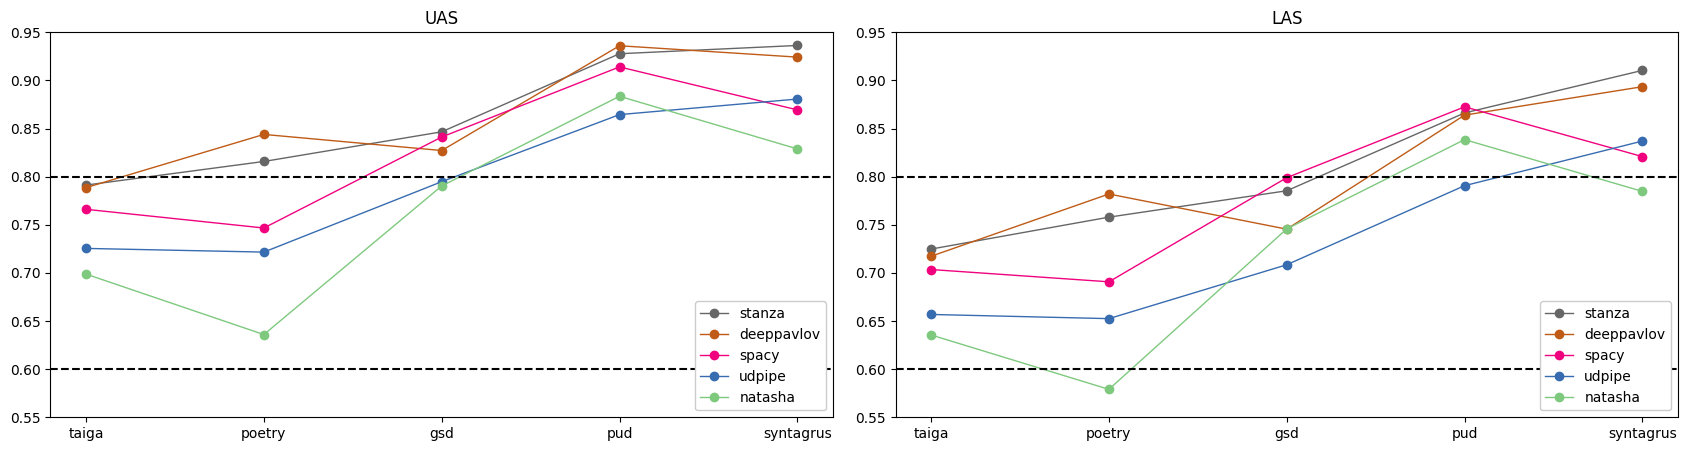

In [44]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

def draw_values(cur_ax, data, title):
    colors = colormaps['Accent'].colors
    colors = (colors[0],) + colors[4:]
    lines = []
    for parser_i, p in list(enumerate(parser_names))[::-1]:
        cur_ax.plot(treebank_names, [data[t][p] for t in treebank_names], color=colors[parser_i], label=p, marker='.', linewidth=1, markersize=12)
    cur_ax.legend(loc='lower right', framealpha=1.0)
    cur_ax.set_title(title)
    cur_ax.axhline(y=0.6, color="black", linestyle="--")
    cur_ax.axhline(y=0.8, color="black", linestyle="--")
    cur_ax.set_ylim([0.55, 0.95])

f, ax = plt.subplots(1, 2, figsize=(21, 5))
plt.subplots_adjust(wspace=0.08, hspace=0.4)
draw_values(ax[0], uas_mean_df, "UAS")
draw_values(ax[1], las_mean_df, "LAS")
plt.savefig("/content/pics/mean_diagram.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/mean_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')

plt.show()

In [45]:
markers = {'natasha': 'X', 'udpipe': 'o', 'spacy': 'D', 'deeppavlov': 's', 'stanza': 'v'}

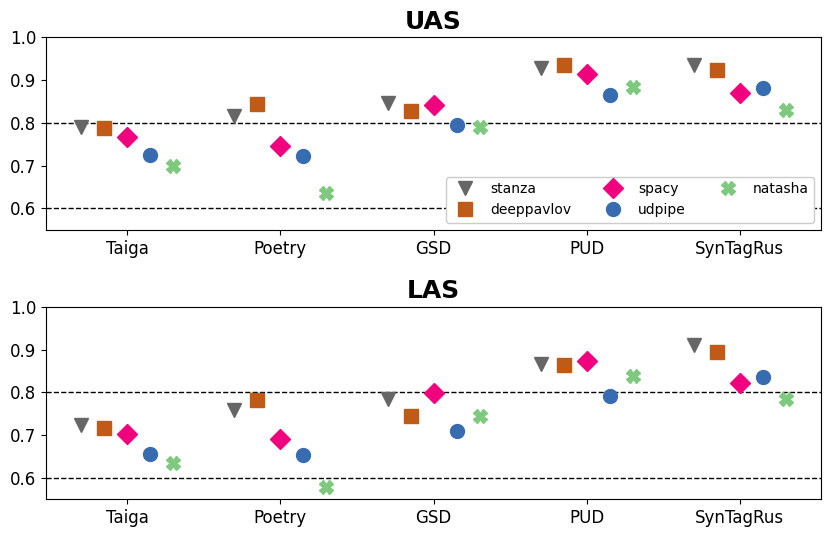

In [46]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

def draw_values(cur_ax, data, title):
    colors = colormaps['Accent'].colors
    colors = (colors[0],) + colors[4:]
    lines = []
    cur_ax.axhline(y=0.6, color="black", linestyle="--", linewidth=1)
    cur_ax.axhline(y=0.8, color="black", linestyle="--", linewidth=1)
    pos = np.array([i for i in range(0, 5)])
    for parser_i, p in list(enumerate(parser_names))[::-1]:
        cur_ax.plot(pos, [data[t][p] for t in treebank_names], color=colors[parser_i],
                    label=p, marker=markers[p], linewidth=0, markersize=10)
        pos = pos +  np.array([0.15] * 5)
    cur_ax.set_xticks(ticks=[i + 0.3 for i in range(0, 5)], labels=treebank_titles)
    cur_ax.set_title(title, size=18, fontweight='bold')

    cur_ax.set_ylim([0.55, 1.0])
    cur_ax.tick_params(axis='both', labelsize=12)

f, ax = plt.subplots(2, 1, figsize=(10, 6), sharey=True)
plt.subplots_adjust(wspace=0.02, hspace=0.4)
draw_values(ax[0], uas_mean_df, "UAS")
ax[0].legend(loc='lower right', framealpha=1.0, ncol=3)
draw_values(ax[1], las_mean_df, "LAS")
plt.savefig("/content/pics/mean_diagram_prez.eps", format='eps', dpi=300, bbox_inches='tight')
#plt.savefig("/content/pics/mean_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')

plt.show()

##UAS/LAS=0.0

In [47]:
uas_0_df = pd.DataFrame([[f"{sum(align_uas_f[treebank][p] == 0.0)} ({sum(align_uas_f[treebank][p] == 0.0) / len(align_uas_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [48]:
uas_0_df

,Taiga,Poetry,GSD,PUD,SynTagRus
Natasha,24 (3%),29 (4%),1 (0%),0 (0%),31 (0%)
UDPipe,24 (3%),17 (2%),2 (0%),0 (0%),21 (0%)
spacy,18 (2%),31 (4%),1 (0%),0 (0%),29 (0%)
DeepPavlov,23 (3%),6 (1%),8 (1%),0 (0%),31 (0%)
Stanza,12 (1%),6 (1%),1 (0%),0 (0%),16 (0%)


In [49]:
las_0_df = pd.DataFrame([[f"{sum(align_las_f[treebank][p] == 0.0)} ({sum(align_las_f[treebank][p] == 0.0) / len(align_las_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [50]:
las_0_df

,Taiga,Poetry,GSD,PUD,SynTagRus
Natasha,34 (4%),33 (5%),2 (0%),0 (0%),35 (0%)
UDPipe,30 (3%),20 (3%),3 (0%),0 (0%),25 (0%)
spacy,23 (3%),33 (5%),1 (0%),0 (0%),35 (0%)
DeepPavlov,26 (3%),7 (1%),9 (1%),0 (0%),35 (0%)
Stanza,14 (2%),7 (1%),3 (0%),0 (0%),17 (0%)


## UAS/LAS=1.0

In [51]:
uas_1_df = pd.DataFrame([[f"{sum(align_uas_f[treebank][p] == 1.0)} ({sum(align_uas_f[treebank][p] == 1.0) / len(align_uas_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [52]:
uas_1_df

,Taiga,Poetry,GSD,PUD,SynTagRus
Natasha,225 (26%),131 (18%),121 (20%),281 (28%),2397 (27%)
UDPipe,246 (28%),192 (26%),137 (23%),282 (28%),3375 (38%)
spacy,288 (33%),201 (28%),177 (29%),376 (38%),3159 (36%)
DeepPavlov,314 (36%),284 (39%),221 (37%),453 (45%),4472 (51%)
Stanza,294 (33%),239 (33%),179 (30%),400 (40%),4708 (54%)


In [53]:
las_1_df = pd.DataFrame([[f"{sum(align_las_f[treebank][p] == 1.0)} ({sum(align_las_f[treebank][p] == 1.0) / len(align_las_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [54]:
las_1_df

,Taiga,Poetry,GSD,PUD,SynTagRus
Natasha,147 (17%),103 (14%),77 (13%),166 (17%),1601 (18%)
UDPipe,159 (18%),137 (19%),46 (8%),109 (11%),2279 (26%)
spacy,199 (23%),152 (21%),119 (20%),226 (23%),1920 (22%)
DeepPavlov,194 (22%),189 (26%),77 (13%),179 (18%),3247 (37%)
Stanza,184 (21%),173 (24%),85 (14%),192 (19%),3606 (41%)


## Распределения

### Графики вида violinplots

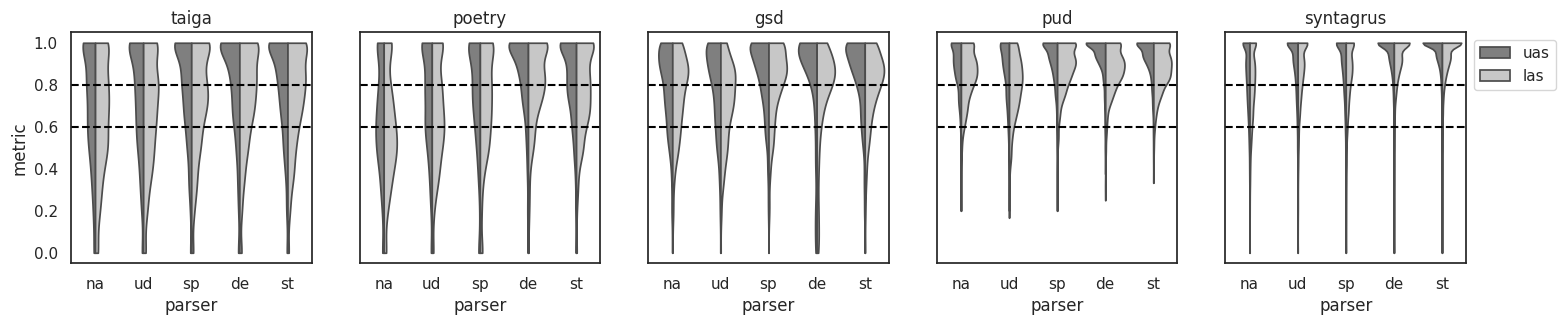

In [55]:
import seaborn as sns
sns.set_theme(style="white", palette=colormaps['tab20'].colors[14:16])
#sns.set_theme(style="white", palette=colormaps['tab20'].colors[3::2])

f, axs = plt.subplots(1, 5, figsize=(18, 3), sharey=True)
for treebank_i, t in enumerate(treebank_names):
    t_list = []
    for p in parser_names:
      t_list += [(m, "uas", p[:2]) for m in align_uas_f[t][p]] + [(m, "las", p[:2]) for m in align_las_f[t][p]]
    t_df = pd.DataFrame(t_list, columns=['metric', 'type', 'parser'])
    sns.violinplot(data=t_df, x="parser", y="metric", hue="type", split=True, cut=0, ax=axs[treebank_i], inner=None, legend=treebank_i == len(treebank_names) - 1)
    axs[treebank_i].axhline(y=0.6, color="black", linestyle="--")
    axs[treebank_i].axhline(y=0.8, color="black", linestyle="--")
    if treebank_i == len(treebank_names) - 1:
        axs[treebank_i].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    axs[treebank_i].set_title(t)
plt.savefig("/content/pics/distribution_diagram.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/distribution_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Статистика по категориям предложений

In [56]:
from collections import Counter


def category(x):
  if x == 1.0:
    return '1.0'
  elif x >= 0.8:
    return '[0.8, 1.0)'
  elif x >= 0.6:
    return '[0.6, 0.8)'
  return '[0.0, 0.6)'

category_list = ['[0.0, 0.6)', '[0.6, 0.8)', '[0.8, 1.0)', '1.0']

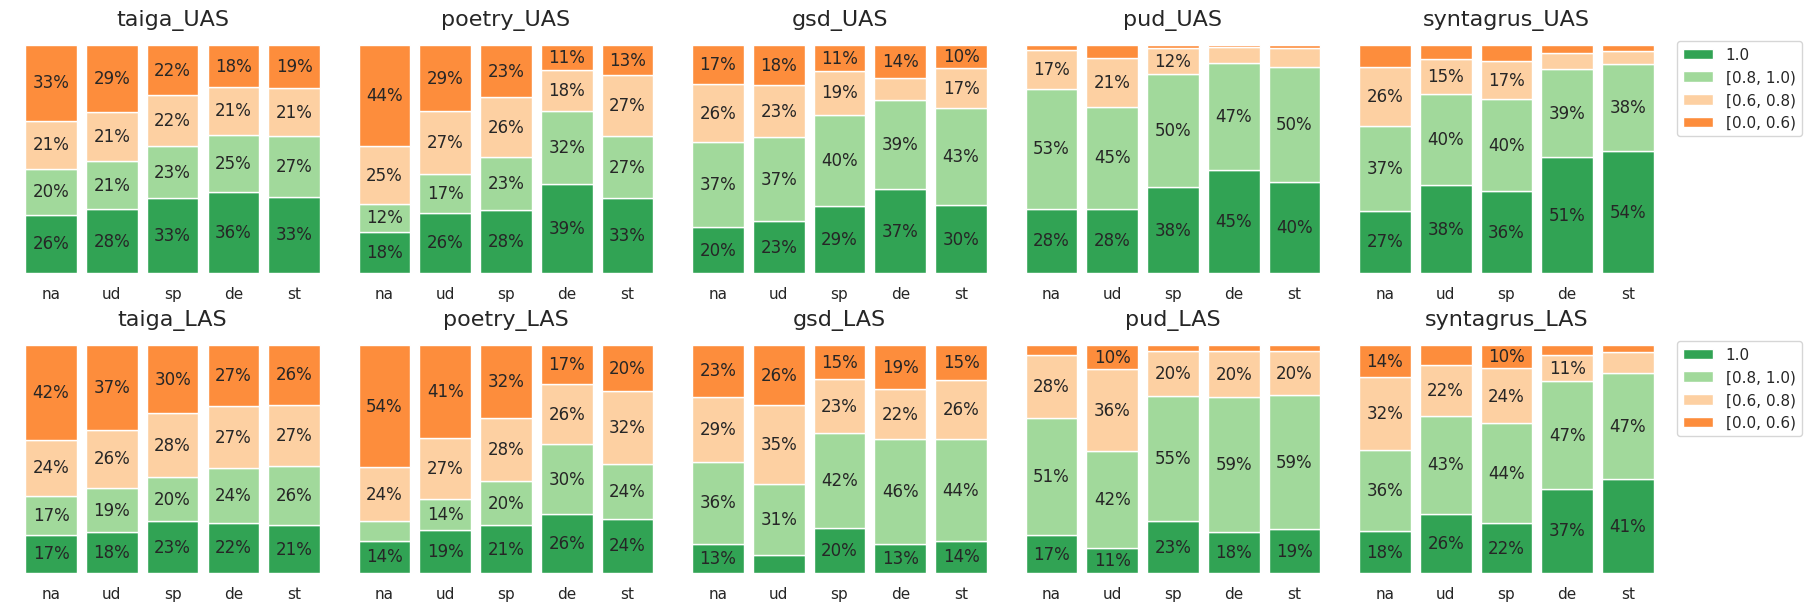

In [57]:
from matplotlib import colormaps

category_list = ['1.0', '[0.8, 1.0)', '[0.6, 0.8)', '[0.0, 0.6)']

def create_stat(t_p_data):
  stat_count = Counter(map(category, list(t_p_data)))
  total = stat_count.total()
  return { cat: stat_count[cat] / total * 100 for cat in category_list}

x_count = 2
y_count = 5
size = 0.5
cmap = colormaps['tab20c'].colors
color_dict = { '[0.0, 0.6)': cmap[5], '[0.6, 0.8)': cmap[7], '[0.8, 1.0)': cmap[10], '1.0': cmap[8] }
f, axs = plt.subplots(x_count, y_count, figsize=(18, 6), sharey=True, constrained_layout=True)
for metric_i, (data, metric, legend_drawing) in enumerate([(align_uas_f, "UAS", True), (align_las_f, "LAS", True)]):
  for treebank_i, t in enumerate(treebank_names):
      cat_df = pd.DataFrame([create_stat(data[t][p]) for p in parser_names],
                            index=[p[:2] for p in parser_names], columns=category_list)
      cat_df.round()
      cur_ax = axs[metric_i][treebank_i]
      #legend_flag = True if treebank_i == len(treebank_names) - 1 else False
      cat_df.plot.bar(stacked=True, color=color_dict, legend=False, ax = cur_ax, width=0.85, rot=0)
      for container in cur_ax.containers:
          cur_ax.bar_label(container, [f"{v:.0f}%" if v >= 10 else "" for v in container.datavalues], label_type='center')
      cur_ax.spines['top'].set_visible(False)
      cur_ax.spines['right'].set_visible(False)
      cur_ax.spines['bottom'].set_visible(False)
      cur_ax.spines['left'].set_visible(False)
      cur_ax.get_yaxis().set_ticks([])
      if legend_drawing and treebank_i == len(treebank_names) - 1:
          cur_ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
      cur_ax.set_title(f"{t}_{metric}", fontdict={'fontsize': 16})
plt.savefig("/content/pics/category_diagram.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/category_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

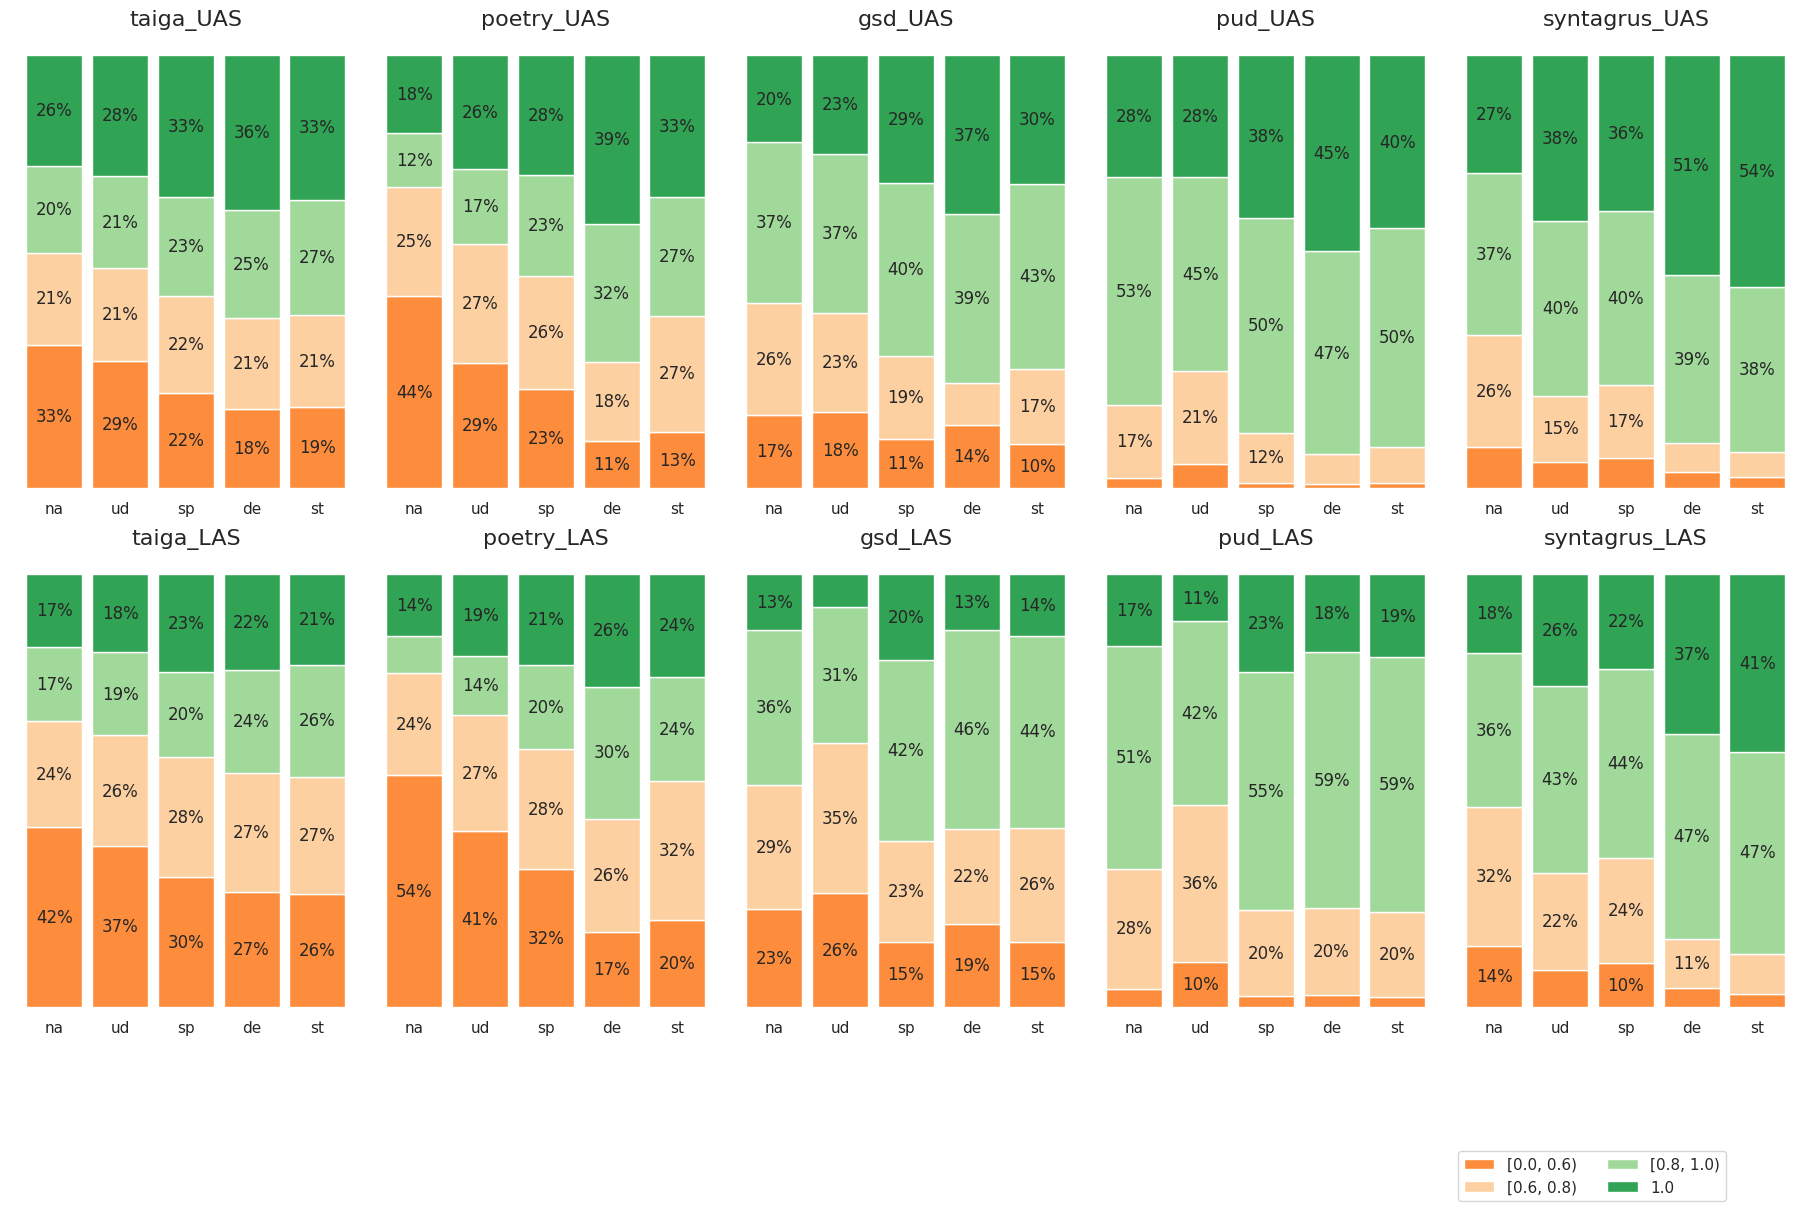

In [58]:
from matplotlib import colormaps

category_list = ['[0.0, 0.6)', '[0.6, 0.8)', '[0.8, 1.0)', '1.0']

def create_stat(t_p_data):
  stat_count = Counter(map(category, list(t_p_data)))
  total = stat_count.total()
  return { cat: stat_count[cat] / total * 100 for cat in category_list}

x_count = 2
y_count = 5
size = 0.5
cmap = colormaps['tab20c'].colors
color_dict = { '[0.0, 0.6)': cmap[5], '[0.6, 0.8)': cmap[7], '[0.8, 1.0)': cmap[10], '1.0': cmap[8] }
f, axs = plt.subplots(x_count, y_count, figsize=(18, 12), sharey=True, constrained_layout=True)
for metric_i, (data, metric, legend_drawing) in enumerate([(align_uas_f, "UAS", True), (align_las_f, "LAS", True)]):
  for treebank_i, t in enumerate(treebank_names):
      cat_df = pd.DataFrame([create_stat(data[t][p]) for p in parser_names],
                            index=[p[:2] for p in parser_names], columns=category_list)
      cat_df.round()
      cur_ax = axs[metric_i][treebank_i]
      #legend_flag = True if treebank_i == len(treebank_names) - 1 else False
      cat_df.plot.bar(stacked=True, color=color_dict, legend=False, ax = cur_ax, width=0.85, rot=0)
      for container in cur_ax.containers:
          cur_ax.bar_label(container, [f"{v:.0f}%" if v >= 10 else "" for v in container.datavalues], label_type='center')
      cur_ax.spines['top'].set_visible(False)
      cur_ax.spines['right'].set_visible(False)
      cur_ax.spines['bottom'].set_visible(False)
      cur_ax.spines['left'].set_visible(False)
      cur_ax.get_yaxis().set_ticks([])
      if legend_drawing and treebank_i == len(treebank_names) - 1 and metric == "LAS":
          cur_ax.legend(loc='upper left', bbox_to_anchor=(0.0, -0.3), ncols=2)
      cur_ax.set_title(f"{t}_{metric}", fontdict={'fontsize': 16})
plt.savefig("/content/pics/category_diagram.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/category_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

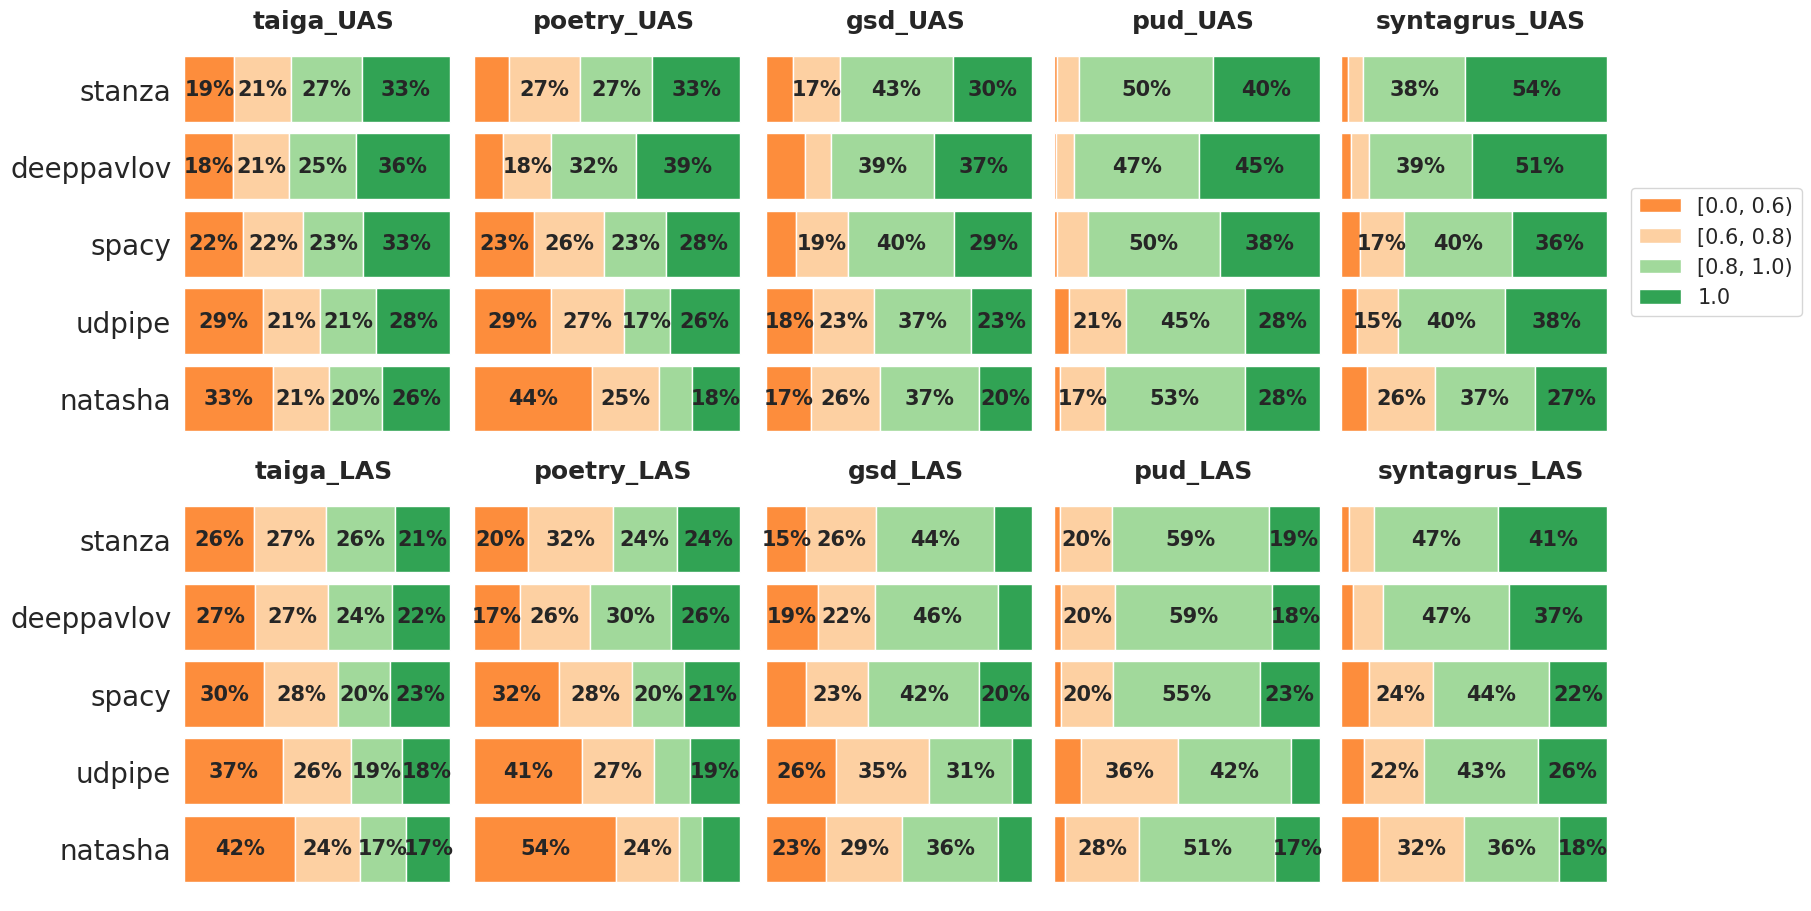

In [123]:
from matplotlib import colormaps

category_list = ['[0.0, 0.6)', '[0.6, 0.8)', '[0.8, 1.0)', '1.0']

def create_stat(t_p_data):
  stat_count = Counter(map(category, list(t_p_data)))
  total = stat_count.total()
  return { cat: stat_count[cat] / total * 100 for cat in category_list}

x_count = 2
y_count = 5
size = 0.5
cmap = colormaps['tab20c'].colors
color_dict = { '[0.0, 0.6)': cmap[5], '[0.6, 0.8)': cmap[7], '[0.8, 1.0)': cmap[10], '1.0': cmap[8] }
f, axs = plt.subplots(x_count, y_count, figsize=(18, 9), sharey=True, constrained_layout=True)
for metric_i, (data, metric, legend_drawing) in enumerate([(align_uas_f, "UAS", True), (align_las_f, "LAS", True)]):
  for treebank_i, t in enumerate(treebank_names):
      cur_ax.tick_params(axis='both', labelsize=20)
      cat_df = pd.DataFrame([create_stat(data[t][p]) for p in parser_names],
                            index=parser_names, columns=category_list)
                            #index=[p[:2] for p in parser_names], columns=category_list)

      cat_df.round()
      cur_ax = axs[metric_i][treebank_i]
      #legend_flag = True if treebank_i == len(treebank_names) - 1 else False
      cat_df.plot.barh(stacked=True, color=color_dict, legend=False, ax = cur_ax, width=0.85, rot=0)
      for container in cur_ax.containers:
          cur_ax.bar_label(container, [f"{v:.0f}%" if v >= 15 else "" for v in container.datavalues],
                           label_type='center', size=15, fontweight='bold')
      cur_ax.spines['top'].set_visible(False)
      cur_ax.spines['right'].set_visible(False)
      cur_ax.spines['bottom'].set_visible(False)
      cur_ax.spines['left'].set_visible(False)
      cur_ax.get_xaxis().set_ticks([])
      if legend_drawing and treebank_i == len(treebank_names) - 1 and metric == "UAS":
          cur_ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.3), ncols=1, fontsize=15)
          #cur_ax.legend(loc='upper left', bbox_to_anchor=(0.0, -0.3), ncols=4)

      cur_ax.set_title(f"{t}_{metric}", size=18, fontweight='bold')
plt.savefig("/content/pics/category_diagram_prez.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/category_diagram_prez.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Графики распределений и графики boxplot

In [60]:
def draw_hboxplot(ax_plot, data, p):
    b = ax_plot.boxplot(x=data, showfliers=False,showcaps=True,showmeans=True,
            meanprops={'color':'grey', 'linewidth': 4, 'linestyle':'solid'},
            medianprops={'color': 'black', 'linewidth': 3},
            vert=False, meanline=True, widths=0.3)
    ax_plot.set_xlim([-0.02, 1.2])
    ax_plot.get_yaxis().set_visible(False)
    c = b['caps'][0]._x[0]
    ax_plot.text(
          c, # x-coordinate
          0.79, # y-coordinate
          f'{c:.2}', # text
          horizontalalignment='center', # centered
          fontsize=12, # small font size
      )

    u_q1 = data.quantile(0.25)
    ax_plot.text(
        u_q1, # x-coordinate
        0.65, # y-coordinate
        f'{u_q1:.2}', # text
        horizontalalignment='center', # centered
        fontsize=12, # small font size
    )
    u_q2 = data.quantile(0.5)
    if u_q2 != 1.0:
      ax_plot.text(
        u_q2, # x-coordinate
        0.5, # y-coordinate
        f'{u_q2:.2}', # text
        horizontalalignment='center', # centered
        fontsize=12, # small font size
        color='black'
      )
    u_q3 = data.quantile(0.75)
    if u_q3 != 1.0:
      ax_plot.text(
        u_q3, # x-coordinate
        0.35, # y-coordinate
        f'{u_q3:.2}', # text
        horizontalalignment='center', # centered
        fontsize=12, # small font size
      )

    u_mean = data.mean()
    if u_mean != 1.0:
      ax_plot.text(
            u_mean, # x-coordinate
            1.2, # y-coordinate
            f'{u_mean:.2}', # text
            horizontalalignment='center', # centered
            fontsize=12, # small font size
            color='black'
      )
    #ax_plot.title.set_text(f"{p}_UAS")

In [61]:
def draw_hist(ax_plot, data):
      step = 0.2
      bins1 = [round(step * i, 1) for i in range(0, 6)] + [1.01]
      v_5 = ax_plot.hist(data, bins=bins1, color="white", edgecolor='black',#'0.4',
                         linewidth=0.4)
      for i, v in enumerate(v_5[0]):
        rate = round(v / len(data) * 100)
        if rate >= 5:
          if i == len(v_5[0]) - 1:
            text_color = 'black'
          else:
            text_color = 'black'#'0.4'
          ax_plot.text(i * step, v + len(data) / 20, f"{rate}%", color=text_color, size=12)
      step2 = 0.05
      max2 = 20
      bins2 = [round(step2 * i, 2) for i in range(0, max2 + 1)] + [1.01]
      v_20 = ax_plot.hist(data, bins=bins2)
      v_20[2][-1].set_facecolor('black')
      ax_plot.set_ylim([0, len(data) * 0.7])
      ax_plot.set_xlim([-0.02, 1.2])
      xlabels = [round(0.2 * i, 2) for i in range(0, 6)]
      ax_plot.set_xticks(xlabels, xlabels, fontdict={'fontsize':12})

In [62]:
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [63]:
def draw_diagrams(data, file_title):
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    matplotlib.rcParams['axes.linewidth'] = 1

    fig = plt.figure(figsize = (16,24))

    gs = gridspec.GridSpec(4 * len(treebank_names), len(parser_names), figure=fig,
                  wspace=0.1, hspace=0.5,
                  height_ratios=(0.01, 0.01,  0.09, 0.09) * len(treebank_names))


    for treebank_i, t in enumerate(treebank_names):
      ax_t = fig.add_subplot(gs[4 * treebank_i, :])
      ax_t.text(0.5, 0.8, t, va="top", ha="center", fontsize=24, weight="bold")
      if treebank_i != 0:
        ax_t.axhline(y=1, color='gray', lw=1)
      ax_t.axis('off')

      for parser_i, p in enumerate(parser_names):
          ax_tp = fig.add_subplot(gs[4 * treebank_i + 1, parser_i])
          ax_tp.text(0.5, 0.5, p, va="top", ha="center", fontsize=18)
          ax_tp.axis('off')

          ax_h = fig.add_subplot(gs[4 * treebank_i + 2, parser_i])
          if parser_i != 0:
              ax_h.get_yaxis().set_visible(False)
          draw_hist(ax_h, data[t][p])

          ax_b = fig.add_subplot(gs[4 * treebank_i + 3, parser_i])
          draw_hboxplot(ax_b, data[t][p], p)
          ax_b.get_xaxis().set_visible(False)
          ax_b.axis('off')


    plt.savefig(f"{file_title}.eps", format='eps', dpi=300, bbox_inches='tight')
    plt.savefig(f"{file_title}.jpg", format='jpg', dpi=300, bbox_inches='tight')

    plt.show()


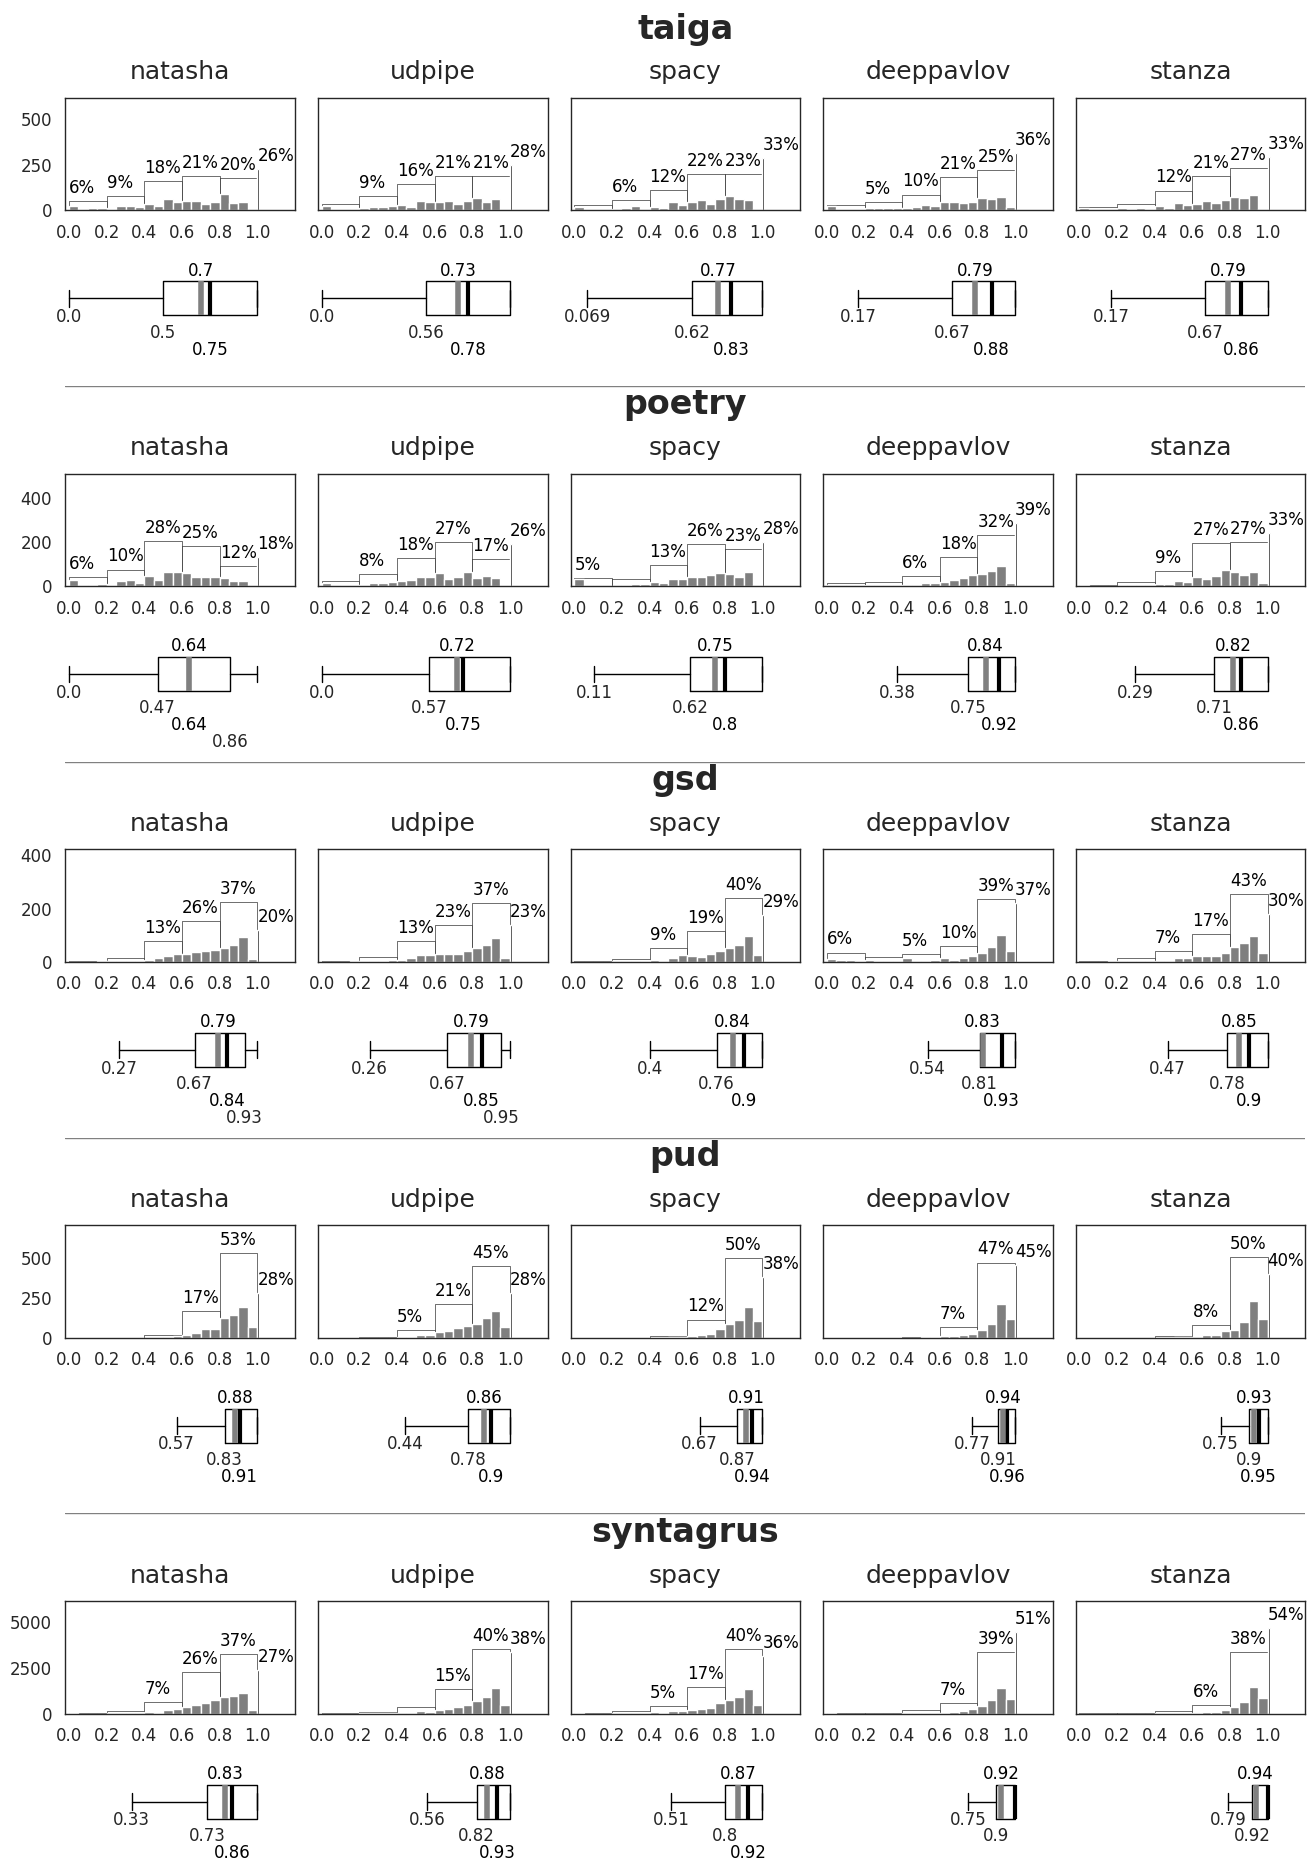

In [64]:
draw_diagrams(align_uas_f, 'pics/uas')

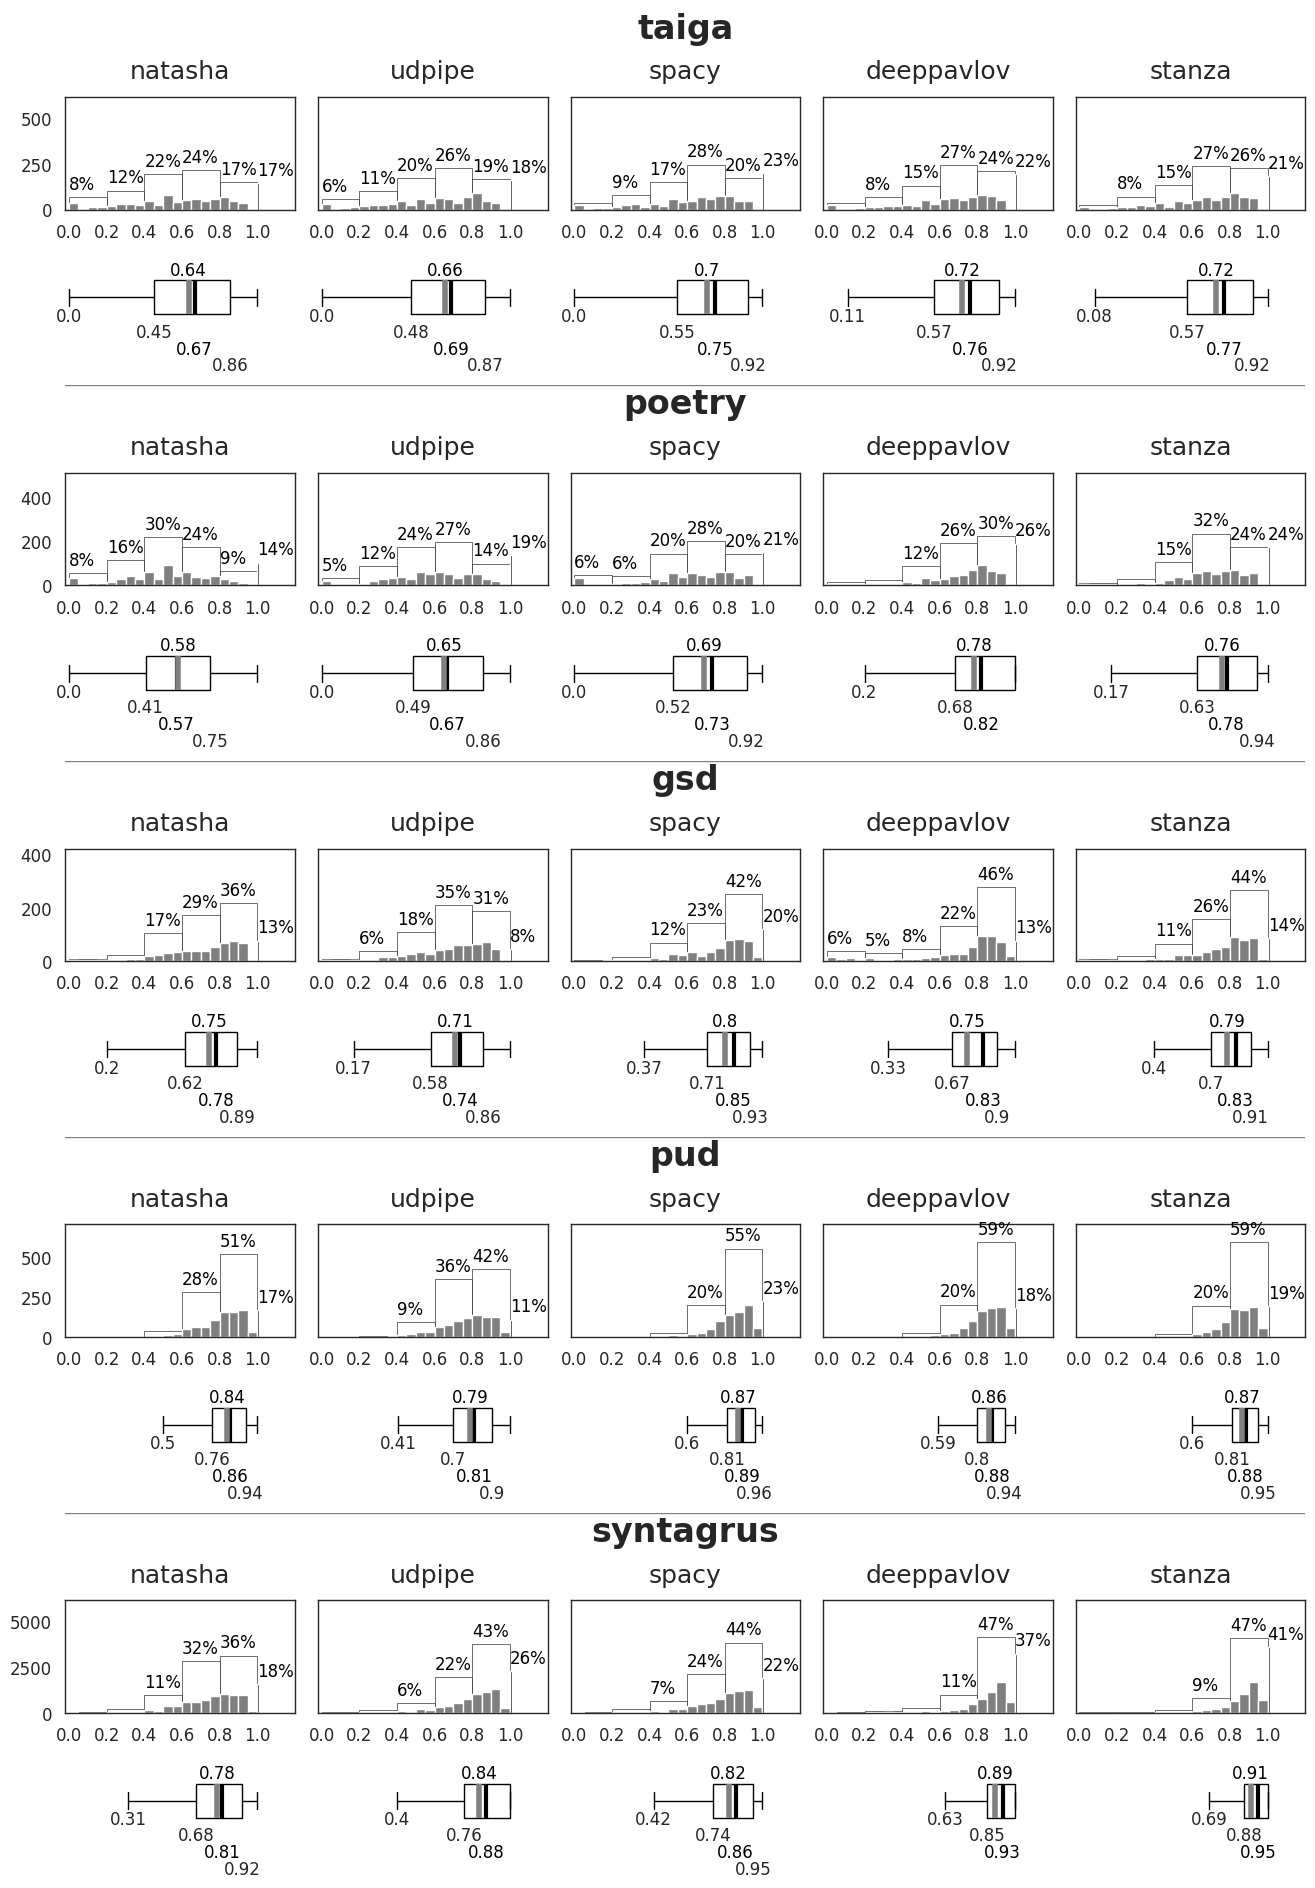

In [65]:
draw_diagrams(align_las_f, 'pics/las')

## Статистика по группам предложений определенной длины

In [66]:
# Количество предложений определенной длины
for tr in treebank_names:
    for (left_border, right_border) in [(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51, 1000000)]:
        print(tr, left_border, right_border,
                  len([s_i for s_i, s in enumerate(be_treebanks[tr].values())
                           if len(s) >= left_border and len(s) < right_border]))
    print()

taiga 0 11 491
taiga 11 21 281
taiga 21 31 81
taiga 31 41 15
taiga 41 51 4
taiga 51 1000000 9

poetry 0 11 324
poetry 11 21 243
poetry 21 31 115
poetry 31 41 30
poetry 41 51 9
poetry 51 1000000 7

gsd 0 11 146
gsd 11 21 251
gsd 21 31 134
gsd 31 41 46
gsd 41 51 13
gsd 51 1000000 11

pud 0 11 124
pud 11 21 474
pud 21 31 307
pud 31 41 79
pud 41 51 16
pud 51 1000000 0

syntagrus 0 11 2485
syntagrus 11 21 3398
syntagrus 21 31 1855
syntagrus 31 41 691
syntagrus 41 51 230
syntagrus 51 1000000 141



In [67]:
be_treebanks['syntagrus']['2020_RFFIMoskva_2042.xml_449']

{(0, 6): ((10, 16), 'obj'),
 (7, 9): ((10, 16), 'advmod'),
 (10, 16): ((26, 32), 'advcl'),
 (16, 17): ((10, 16), 'punct'),
 (18, 21): ((26, 32), 'nsubj'),
 (22, 25): ((26, 32), 'iobj'),
 (26, 32): ((-1, -1), 'root'),
 (33, 39): ((26, 32), 'obj'),
 (40, 46): ((33, 39), 'nmod'),
 (46, 47): ((26, 32), 'punct')}

In [68]:
# UAS
for tr in treebank_names:
  for p in parser_names:
    for (left_border, right_border) in [(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51, 1000000)]:
        print(tr, p, left_border, right_border,
                  round(align_uas_f[tr][p].loc[[s_i for s_i, s in enumerate(be_treebanks[tr].values())
                                                  if len(s) >= left_border and len(s) < right_border]].mean(), 2))
  print()

taiga natasha 0 11 0.71
taiga natasha 11 21 0.71
taiga natasha 21 31 0.63
taiga natasha 31 41 0.62
taiga natasha 41 51 0.61
taiga natasha 51 1000000 0.48
taiga udpipe 0 11 0.73
taiga udpipe 11 21 0.73
taiga udpipe 21 31 0.7
taiga udpipe 31 41 0.73
taiga udpipe 41 51 0.76
taiga udpipe 51 1000000 0.64
taiga spacy 0 11 0.78
taiga spacy 11 21 0.75
taiga spacy 21 31 0.74
taiga spacy 31 41 0.78
taiga spacy 41 51 0.7
taiga spacy 51 1000000 0.68
taiga deeppavlov 0 11 0.79
taiga deeppavlov 11 21 0.79
taiga deeppavlov 21 31 0.78
taiga deeppavlov 31 41 0.81
taiga deeppavlov 41 51 0.77
taiga deeppavlov 51 1000000 0.73
taiga stanza 0 11 0.79
taiga stanza 11 21 0.8
taiga stanza 21 31 0.78
taiga stanza 31 41 0.84
taiga stanza 41 51 0.82
taiga stanza 51 1000000 0.68

poetry natasha 0 11 0.68
poetry natasha 11 21 0.64
poetry natasha 21 31 0.56
poetry natasha 31 41 0.53
poetry natasha 41 51 0.5
poetry natasha 51 1000000 0.46
poetry udpipe 0 11 0.75
poetry udpipe 11 21 0.72
poetry udpipe 21 31 0.67
poetr

In [69]:
# LAS
for tr in treebank_names:
  for p in parser_names:
    for (left_border, right_border) in [(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51, 1000000)]:
        print(tr, p, left_border, right_border,
                  round(align_las_f[tr][p].loc[[s_i for s_i, s in enumerate(be_treebanks[tr].values())
                                                  if len(s) >= left_border and len(s) < right_border]].mean(), 2))
  print()

taiga natasha 0 11 0.64
taiga natasha 11 21 0.65
taiga natasha 21 31 0.58
taiga natasha 31 41 0.58
taiga natasha 41 51 0.56
taiga natasha 51 1000000 0.45
taiga udpipe 0 11 0.66
taiga udpipe 11 21 0.65
taiga udpipe 21 31 0.63
taiga udpipe 31 41 0.66
taiga udpipe 41 51 0.69
taiga udpipe 51 1000000 0.57
taiga spacy 0 11 0.71
taiga spacy 11 21 0.69
taiga spacy 21 31 0.69
taiga spacy 31 41 0.72
taiga spacy 41 51 0.65
taiga spacy 51 1000000 0.63
taiga deeppavlov 0 11 0.72
taiga deeppavlov 11 21 0.72
taiga deeppavlov 21 31 0.71
taiga deeppavlov 31 41 0.75
taiga deeppavlov 41 51 0.72
taiga deeppavlov 51 1000000 0.64
taiga stanza 0 11 0.72
taiga stanza 11 21 0.73
taiga stanza 21 31 0.71
taiga stanza 31 41 0.78
taiga stanza 41 51 0.75
taiga stanza 51 1000000 0.62

poetry natasha 0 11 0.63
poetry natasha 11 21 0.57
poetry natasha 21 31 0.5
poetry natasha 31 41 0.47
poetry natasha 41 51 0.45
poetry natasha 51 1000000 0.41
poetry udpipe 0 11 0.69
poetry udpipe 11 21 0.65
poetry udpipe 21 31 0.59
po

In [70]:
d = align_uas_f['pud']['deeppavlov'].loc[[s_i for s_i, s in enumerate(be_treebanks['pud'].values())
                                      if len(s) >= 0 and len(s) < 11]]
print(len(d[d != 1.0]) / len(d))

0.1935483870967742


In [71]:
len(d)

124

In [72]:
len(d[d != 1.0])

24

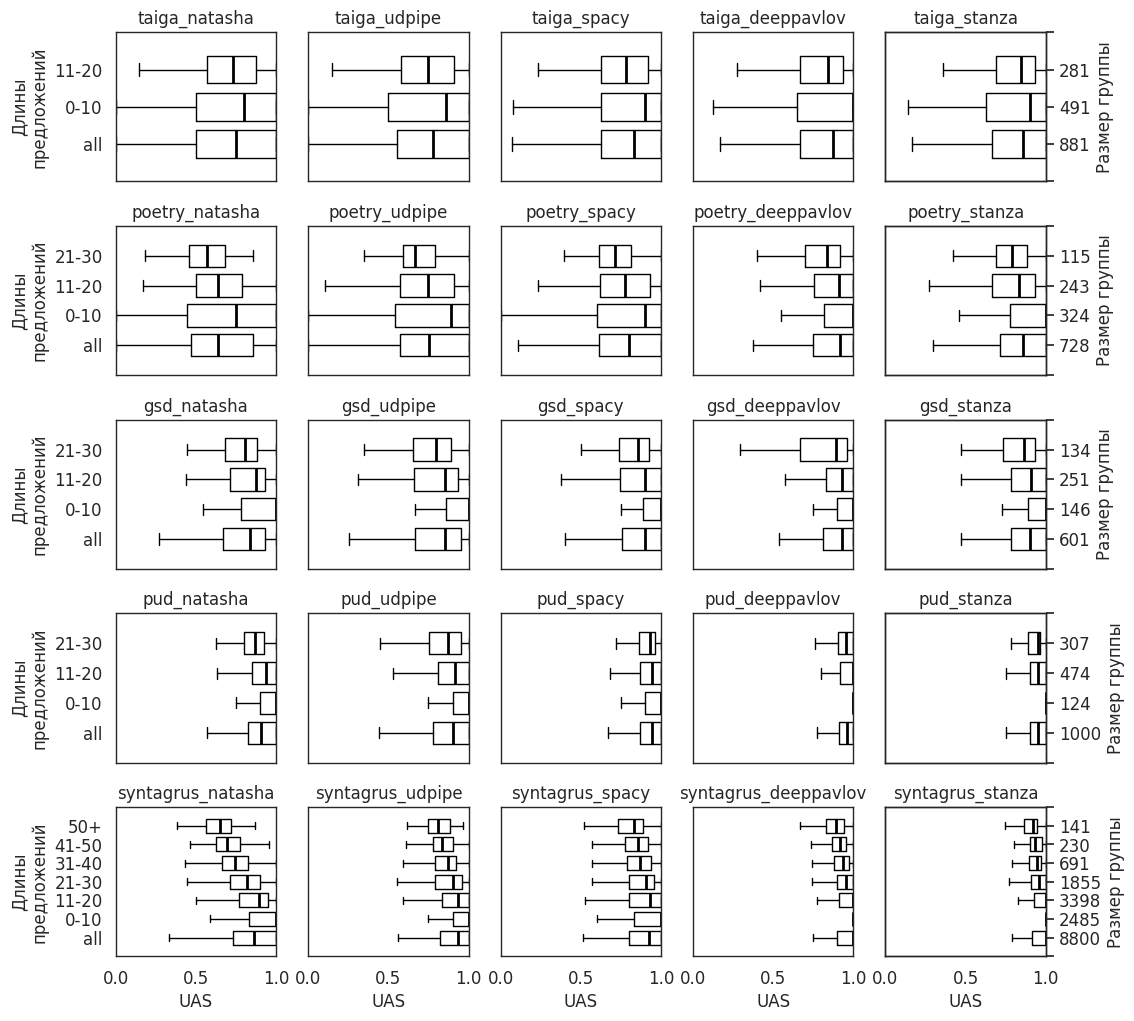

In [73]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), sharex=True, figsize=(12, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
left, right = -1, 7
min_value_border = 100
for tr_i, tr in enumerate(treebank_names):
  sent_amount_labels = []
  sent_amount_labels.append(str(len(be_treebanks[tr])))
  y_labels = ["all"]
  size_labels = [sent_amount_labels[-1]]
  for border_i, (left_border, right_border) in enumerate([(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51, 1000000)]):
    sent_amount_labels.append(str(len([s_i for s_i, s in enumerate(be_treebanks[tr].values())
                           if len(s) >= left_border and len(s) < right_border])))
    if int(sent_amount_labels[-1]) >= min_value_border:
        y_labels.append(f"{left_border}-{right_border - 1}" if left_border != 51 else "50+")
        size_labels.append(sent_amount_labels[-1])
  for p_i, p in enumerate(parser_names):

    axs[tr_i][p_i].boxplot(align_uas_f[tr][p], positions=[0], orientation='horizontal', showfliers=False, widths=0.75,
                           medianprops={'linewidth':2.0, 'color':'black'})
    for border_i, (left_border, right_border) in enumerate([(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51, 1000000)]):
        if int(sent_amount_labels[border_i + 1]) >= min_value_border:
            d = align_uas_f[tr][p].loc[[s_i for s_i, s in enumerate(be_treebanks[tr].values())
                                                  if len(s) >= left_border and len(s) < right_border]]
            axs[tr_i][p_i].boxplot(d, positions=[border_i + 1], orientation='horizontal', showfliers=False,
                               widths=0.75, medianprops={'linewidth':2.0, 'color':'black'})
        axs[tr_i][p_i].set_yticks(range(len(y_labels)), labels=y_labels)
        axs[tr_i][p_i].set_xlim(0.0, 1.0)
        axs[tr_i][p_i].set_ylim(left, len(y_labels))
        axs[tr_i][p_i].set_title(f"{tr}_{p}")
    if p_i != 0:
        axs[tr_i][p_i].set_yticks([])
    axs[-1][p_i].set_xlabel("UAS")

  axs[tr_i][0].set_ylabel("Длины\nпредложений")

  ax2 = axs[tr_i][-1].twinx()  # instantiate a second Axes that shares the same x-axis
  ax2.set_yticks(range(left, len(size_labels) + 1), labels= [""] + size_labels + [""])
  ax2.set_ylabel("Размер группы")
plt.savefig("/content/pics/depth_uas_boxplots.jpg", format='jpg', dpi=300, bbox_inches='tight')
#plt.legend()

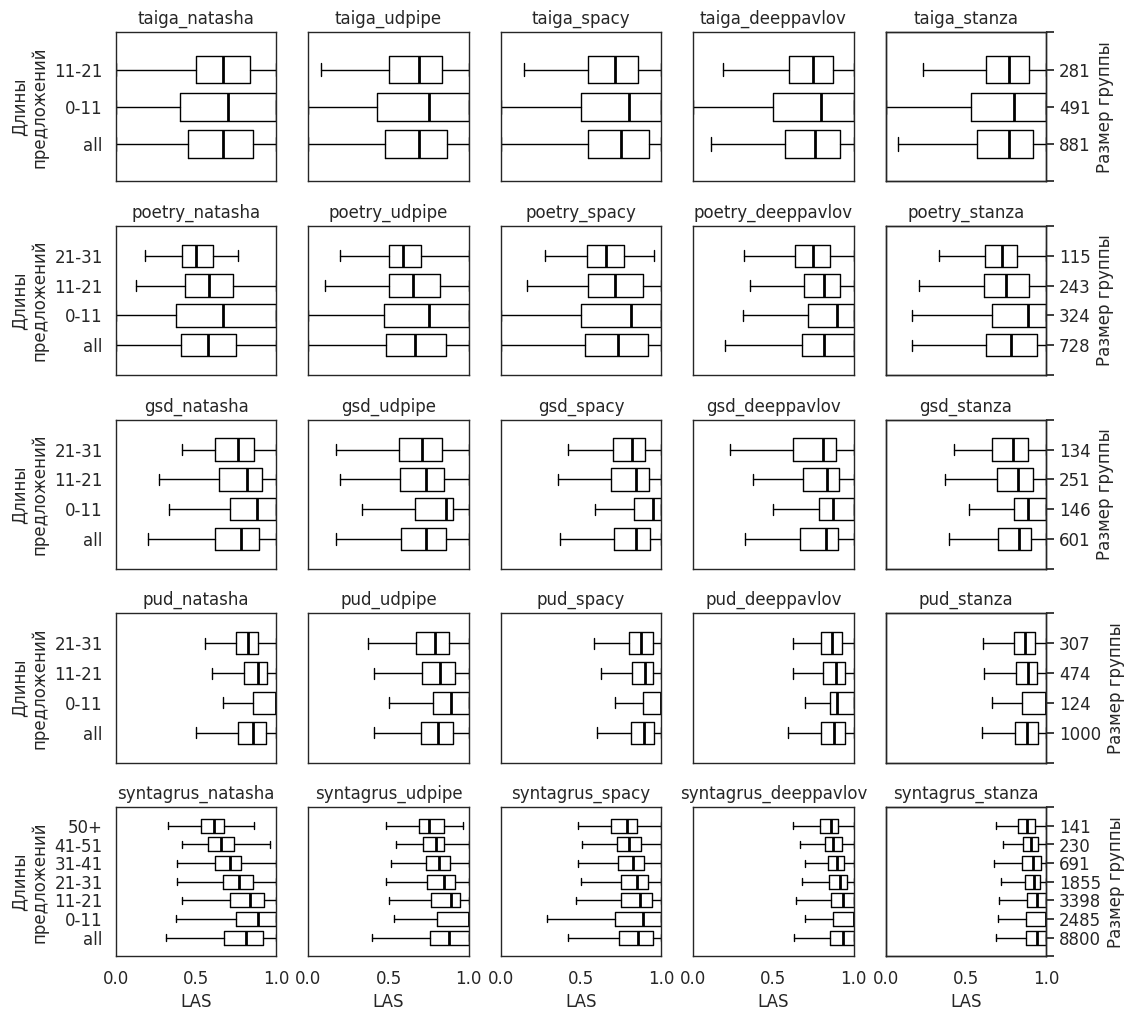

In [74]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), sharex=True, figsize=(12, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
left, right = -1, 7
min_value_border = 100
for tr_i, tr in enumerate(treebank_names):
  sent_amount_labels = []
  sent_amount_labels.append(str(len(be_treebanks[tr])))
  y_labels = ["all"]
  size_labels = [sent_amount_labels[-1]]
  for border_i, (left_border, right_border) in enumerate([(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51, 1000000)]):
    sent_amount_labels.append(str(len([s_i for s_i, s in enumerate(be_treebanks[tr].values())
                           if len(s) >= left_border and len(s) < right_border])))
    if int(sent_amount_labels[-1]) >= min_value_border:
        y_labels.append(f"{left_border}-{right_border}" if left_border != 51 else "50+")
        size_labels.append(sent_amount_labels[-1])
  for p_i, p in enumerate(parser_names):

    axs[tr_i][p_i].boxplot(align_las_f[tr][p], positions=[0], orientation='horizontal', showfliers=False, widths=0.75,
                           medianprops={'linewidth':2.0, 'color':'black'})
    for border_i, (left_border, right_border) in enumerate([(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51, 1000000)]):
        if int(sent_amount_labels[border_i + 1]) >= min_value_border:
            d = align_las_f[tr][p].loc[[s_i for s_i, s in enumerate(be_treebanks[tr].values())
                                                  if len(s) >= left_border and len(s) < right_border]]
            axs[tr_i][p_i].boxplot(d, positions=[border_i + 1], orientation='horizontal', showfliers=False,
                               widths=0.75, medianprops={'linewidth':2.0, 'color':'black'})
        axs[tr_i][p_i].set_yticks(range(len(y_labels)), labels=y_labels)
        axs[tr_i][p_i].set_xlim(0.0, 1.0)
        axs[tr_i][p_i].set_ylim(left, len(y_labels))
        axs[tr_i][p_i].set_title(f"{tr}_{p}")
    if p_i != 0:
        axs[tr_i][p_i].set_yticks([])
    axs[-1][p_i].set_xlabel("LAS")

  axs[tr_i][0].set_ylabel("Длины\nпредложений")

  ax2 = axs[tr_i][-1].twinx()  # instantiate a second Axes that shares the same x-axis
  ax2.set_yticks(range(left, len(size_labels) + 1), labels= [""] + size_labels + [""])
  ax2.set_ylabel("Размер группы")
plt.savefig("/content/pics/depth_las_boxplots.jpg", format='jpg', dpi=300, bbox_inches='tight')
#plt.legend()

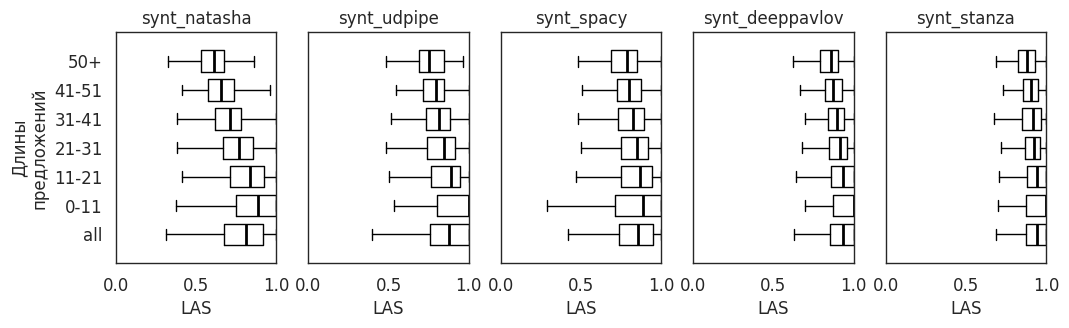

In [75]:
f, axs = plt.subplots(1, len(parser_names), sharex=True, figsize=(12, 3))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
left, right = -1, 7
min_value_border = 100
tr = 'syntagrus'
sent_amount_labels = []
sent_amount_labels.append(str(len(be_treebanks[tr])))
y_labels = ["all"]
size_labels = [sent_amount_labels[-1]]
for border_i, (left_border, right_border) in enumerate([(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51, 1000000)]):
  sent_amount_labels.append(str(len([s_i for s_i, s in enumerate(be_treebanks[tr].values())
                          if len(s) >= left_border and len(s) < right_border])))
  if int(sent_amount_labels[-1]) >= min_value_border:
      y_labels.append(f"{left_border}-{right_border}" if left_border != 51 else "50+")
      size_labels.append(sent_amount_labels[-1])
for p_i, p in enumerate(parser_names):

  axs[p_i].boxplot(align_las_f[tr][p], positions=[0], orientation='horizontal', showfliers=False, widths=0.75,
                          medianprops={'linewidth':2.0, 'color':'black'})
  for border_i, (left_border, right_border) in enumerate([(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51, 1000000)]):
      if int(sent_amount_labels[border_i + 1]) >= min_value_border:
          d = align_las_f[tr][p].loc[[s_i for s_i, s in enumerate(be_treebanks[tr].values())
                                                if len(s) >= left_border and len(s) < right_border]]
          axs[p_i].boxplot(d, positions=[border_i + 1], orientation='horizontal', showfliers=False,
                              widths=0.75, medianprops={'linewidth':2.0, 'color':'black'})
      axs[p_i].set_yticks(range(len(y_labels)), labels=y_labels)
      axs[p_i].set_xlim(0.0, 1.0)
      axs[p_i].set_ylim(left, len(y_labels))
      axs[p_i].set_title(f"synt_{p}")
  if p_i != 0:
      axs[p_i].set_yticks([])
  axs[p_i].set_xlabel("LAS")

axs[0].set_ylabel("Длины\nпредложений")

#ax2 = axs[-1].twinx()  # instantiate a second Axes that shares the same x-axis
#ax2.set_yticks(range(left, len(size_labels) + 1), labels= [""] + size_labels + [""])
#ax2.set_ylabel("Размер группы")
plt.savefig("/content/pics/depth_las_boxplots_prez.eps", format='eps', dpi=300, bbox_inches='tight')
#plt.legend()

# Сравнение на уровне токенов

## Создание статистики на уровне токенов

In [76]:
[len(be_treebanks[tr]) for tr in treebank_names]

[881, 728, 601, 1000, 8800]

In [77]:
[[len(be_parser_res[p][tr]) for tr in treebank_names] for p in parser_names]

[[881, 728, 601, 1000, 8800],
 [881, 728, 601, 1000, 8800],
 [881, 728, 601, 1000, 8800],
 [881, 728, 601, 1000, 8800],
 [881, 728, 601, 1000, 8800]]

In [78]:
import pandas as pd
import numpy as np

In [79]:
result_df = {}
for tr in treebank_names:
    data_to_df = []
    for sent_i, sent_be in be_treebanks[tr].items():
        for gold_token_be, (gold_parent_be, gold_type) in sent_be.items():
          token_dict = { 'sent_i': sent_i, 'gold_token': gold_token_be,
                        'gold_parent': gold_parent_be, 'gold_type': gold_type}
          gold_token = be_token_dict_gold[tr][sent_i][gold_token_be]
          token_dict['gold_pos'] = gold_token.pos
          token_dict['gold_relation'] = gold_token.relation
          token_dict['gold_depth'] = gold_token.root_depth
          if gold_parent_be != (-1, -1):
              gold_parent = be_token_dict_gold[tr][sent_i][gold_parent_be]
              dep_len = int(gold_token.id) - int(gold_parent.id)
          else:
              dep_len = np.nan
          token_dict['gold_dep_len'] = dep_len
          for p in parser_names:
            if gold_token_be in be_parser_res[p][tr][sent_i]:
              token_dict[f'{p}_parent'], token_dict[f'{p}_type'] = be_parser_res[p][tr][sent_i][gold_token_be]
            else:
              token_dict[f'{p}_parent'], token_dict[f'{p}_type'] = None, None

          data_to_df.append( token_dict)

    result_df[tr] = pd.DataFrame(data_to_df)

In [80]:
result_df['taiga'].head(20)

,sent_i,gold_token,gold_parent,gold_type,gold_pos,gold_relation,gold_depth,gold_dep_len,natasha_parent,natasha_type,udpipe_parent,udpipe_type,spacy_parent,spacy_type,deeppavlov_parent,deeppavlov_type,stanza_parent,stanza_type
0,1,"(0, 3)","(4, 9)",advmod,ADV,advmod,3,-1.0,"(4, 9)",advmod,"(4, 9)",obl,"(29, 33)",nsubj,"(4, 9)",obl,"(4, 9)",obl
1,1,"(4, 9)","(12, 18)",obl,NOUN,obl,2,-2.0,"(29, 33)",obl,"(-1, -1)",root,"(0, 3)",nmod,"(29, 33)",obl,"(12, 18)",nmod
2,1,"(10, 11)","(12, 18)",case,ADP,case,2,-1.0,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case
3,1,"(12, 18)","(-1, -1)",root,NOUN,root,1,NaN,"(29, 33)",obl,"(4, 9)",nmod,"(29, 33)",obl,"(29, 33)",obl,"(-1, -1)",root
4,1,"(19, 22)","(12, 18)",nmod,PROPN,nmod,2,1.0,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod
5,1,"(23, 24)","(25, 28)",cc,CCONJ,cc,4,-1.0,"(25, 28)",cc,"(25, 28)",cc,"(25, 28)",cc,"(25, 28)",cc,"(25, 28)",cc
6,1,"(25, 28)","(19, 22)",conj,PROPN,conj,3,2.0,"(19, 22)",conj,"(19, 22)",conj,"(19, 22)",conj,"(19, 22)",conj,"(19, 22)",conj
7,1,"(29, 33)","(12, 18)",cop,AUX,cop,2,4.0,"(-1, -1)",root,"(44, 50)",cop,"(-1, -1)",root,"(-1, -1)",root,"(12, 18)",cop
8,1,"(34, 39)","(40, 43)",advmod,ADV,advmod,4,-1.0,"(29, 33)",nsubj,"(44, 50)",nummod:gov,"(29, 33)",nsubj,"(29, 33)",nsubj,"(12, 18)",nsubj
9,1,"(40, 43)","(44, 50)",nummod:gov,NUM,nummod:gov,3,-1.0,"(44, 50)",nummod,"(44, 50)",nummod,"(44, 50)",nummod,"(44, 50)",nummod,"(44, 50)",nummod


In [81]:
def f_parent(d):
  #print(d, "\n\n")
  right_amount = len(d[d['gold_parent'] == d['parser_parent']])
  return (right_amount, right_amount / len(d), len(d))

def f_parent_relation(d):
  right_amount = len(d[(d['gold_parent'] == d['parser_parent']) & (d['gold_relation'] == d['parser_relation'])])
  return (right_amount, right_amount / len(d), len(d))

def create_property_stat(df, p, prop, labeled=False):
    if labeled:
      f = f_parent_relation
    else:
      f = f_parent
    d = df.rename(columns={ f'{p}_parent': 'parser_parent',
                            f'{p}_type': 'parser_relation'}).groupby(prop)[['gold_parent', 'parser_parent',
                            'gold_relation', 'parser_relation']].apply(f).to_frame('group_stat')
    d['right'] = d['group_stat'].apply(lambda x: x[0])
    d['right_percent'] = d['group_stat'].apply(lambda x: x[1])
    d['all'] = d['group_stat'].apply(lambda x: x[2])
    d.drop('group_stat', axis=1, inplace=True)
    return d

In [82]:
for tr in treebank_names:
  print(tr, len(result_df[tr]))

taiga 10274
poetry 10038
gsd 11385
pud 19355
syntagrus 157718


## Доля токенов

### Доля токенов с верным родительским токеном

In [83]:
for tr in treebank_names:
  for p in parser_names:
    d = result_df[tr][(result_df[tr]['gold_parent'] == result_df[tr][f'{p}_parent']) &
                      (~result_df[tr][f'{p}_parent'].isnull())]
    print(tr, p, f"{round(len(d) / len(result_df[tr]) * 100)}%")

taiga natasha 67%
taiga udpipe 72%
taiga spacy 75%
taiga deeppavlov 79%
taiga stanza 79%
poetry natasha 59%
poetry udpipe 69%
poetry spacy 73%
poetry deeppavlov 82%
poetry stanza 79%
gsd natasha 76%
gsd udpipe 77%
gsd spacy 82%
gsd deeppavlov 78%
gsd stanza 83%
pud natasha 87%
pud udpipe 85%
pud spacy 91%
pud deeppavlov 93%
pud stanza 92%
syntagrus natasha 79%
syntagrus udpipe 87%
syntagrus spacy 87%
syntagrus deeppavlov 92%
syntagrus stanza 93%


### Доля токенов с верным родительским токеном и верным типом связи

In [84]:
for p in parser_names:
  for tr in treebank_names:
    d = result_df[tr][(result_df[tr]['gold_parent'] == result_df[tr][f'{p}_parent']) &
                      (result_df[tr]['gold_type'] == result_df[tr][f'{p}_type']) &
                      (~result_df[tr][f'{p}_parent'].isnull())]
    print(tr, p, f"{round(len(d) / len(result_df[tr]) * 100)}%")

taiga natasha 62%
poetry natasha 53%
gsd natasha 71%
pud natasha 82%
syntagrus natasha 75%
taiga udpipe 65%
poetry udpipe 62%
gsd udpipe 69%
pud udpipe 77%
syntagrus udpipe 82%
taiga spacy 69%
poetry spacy 67%
gsd spacy 78%
pud spacy 87%
syntagrus spacy 82%
taiga deeppavlov 72%
poetry deeppavlov 75%
gsd deeppavlov 70%
pud deeppavlov 86%
syntagrus deeppavlov 88%
taiga stanza 73%
poetry stanza 73%
gsd stanza 77%
pud stanza 86%
syntagrus stanza 91%


### Доля токенов с верным родительским токеном и неверным типом связи

In [85]:
for p in parser_names:
  for tr in treebank_names:
    d = result_df[tr][(result_df[tr]['gold_parent'] == result_df[tr][f'{p}_parent']) &
                      (result_df[tr]['gold_type'] != result_df[tr][f'{p}_type']) &
                      (~result_df[tr][f'{p}_parent'].isnull())]
    print(tr, p, f"{round(len(d) / len(result_df[tr]) * 100)}%")

taiga natasha 6%
poetry natasha 6%
gsd natasha 5%
pud natasha 5%
syntagrus natasha 4%
taiga udpipe 7%
poetry udpipe 8%
gsd udpipe 8%
pud udpipe 7%
syntagrus udpipe 5%
taiga spacy 6%
poetry spacy 6%
gsd spacy 4%
pud spacy 4%
syntagrus spacy 5%
taiga deeppavlov 7%
poetry deeppavlov 7%
gsd deeppavlov 8%
pud deeppavlov 7%
syntagrus deeppavlov 3%
taiga stanza 7%
poetry stanza 6%
gsd stanza 6%
pud stanza 6%
syntagrus stanza 3%


### Доля токенов с верной токенизацией и неверным родительским токеном

In [86]:
for p in parser_names:
  for tr in treebank_names:
    d = result_df[tr][(result_df[tr]['gold_parent'] != result_df[tr][f'{p}_parent']) &
                      (~result_df[tr][f'{p}_parent'].isnull())]
    print(tr, p, f"{round(len(d) / len(result_df[tr]) * 100)}%")

taiga natasha 29%
poetry natasha 40%
gsd natasha 21%
pud natasha 13%
syntagrus natasha 19%
taiga udpipe 24%
poetry udpipe 27%
gsd udpipe 17%
pud udpipe 12%
syntagrus udpipe 13%
taiga spacy 22%
poetry spacy 26%
gsd spacy 14%
pud spacy 8%
syntagrus spacy 12%
taiga deeppavlov 17%
poetry deeppavlov 17%
gsd deeppavlov 8%
pud deeppavlov 7%
syntagrus deeppavlov 7%
taiga stanza 18%
poetry stanza 17%
gsd stanza 11%
pud stanza 7%
syntagrus stanza 7%


### Доля токенов с неверной токенизацией

In [87]:
for p in parser_names:
  for tr in treebank_names:
    d = result_df[tr][result_df[tr][f'{p}_parent'].isnull()]
    print(tr, p, f"{round(len(d) / len(result_df[tr]) * 100)}%")

taiga natasha 3%
poetry natasha 1%
gsd natasha 4%
pud natasha 1%
syntagrus natasha 1%
taiga udpipe 4%
poetry udpipe 4%
gsd udpipe 6%
pud udpipe 3%
syntagrus udpipe 0%
taiga spacy 3%
poetry spacy 1%
gsd spacy 4%
pud spacy 1%
syntagrus spacy 1%
taiga deeppavlov 4%
poetry deeppavlov 2%
gsd deeppavlov 14%
pud deeppavlov 0%
syntagrus deeppavlov 1%
taiga stanza 3%
poetry stanza 3%
gsd stanza 6%
pud stanza 0%
syntagrus stanza 0%


## Группы токенов

### Эталонный тип связи

In [88]:
top_rel = set()
for tr in treebank_names:
    top_rel |= set(result_df[tr]['gold_type'].value_counts(normalize=True).head(3).index)
top_rel = list(top_rel)

In [89]:
top_rel

['nmod', 'root', 'case', 'punct', 'conj', 'obl']

In [90]:
top_rel.sort(key=lambda r: - len(result_df['taiga']['gold_type'][result_df['taiga']['gold_type'] == r]))

In [91]:
top_rel

['punct', 'case', 'root', 'conj', 'nmod', 'obl']

In [92]:
# Количество токенов с определенным эталонным типом связи
for tr in treebank_names:
  for rel in top_rel:
    print(tr, rel, len(result_df[tr]['gold_type'][result_df[tr]['gold_type'] == rel]))
  print()

taiga punct 2099
taiga case 887
taiga root 881
taiga conj 625
taiga nmod 613
taiga obl 564

poetry punct 2130
poetry case 841
poetry root 728
poetry conj 850
poetry nmod 396
poetry obl 648

gsd punct 2093
gsd case 1262
gsd root 601
gsd conj 531
gsd nmod 1250
gsd obl 923

pud punct 2977
pud case 2121
pud root 1000
pud conj 695
pud nmod 1934
pud obl 1465

syntagrus punct 29463
syntagrus case 14943
syntagrus root 8800
syntagrus conj 7640
syntagrus nmod 12179
syntagrus obl 13272



In [93]:
# Unlabeled тип сопоставления, статистика по токенам
relation_stat_u = {p: {} for p in parser_names}
for p in parser_names:
  relation_stat_u[p] = {}
  for tr in treebank_names:
    relation_stat_u[p][tr] = create_property_stat(result_df[tr], p, 'gold_relation')

In [94]:
for tr in treebank_names:
  for p in parser_names:
    for rel in top_rel:
      print(p, tr, rel, f"{round(relation_stat_u[p][tr].loc[rel]['right_percent'] * 100)}%")
  print()

natasha taiga punct 60%
natasha taiga case 92%
natasha taiga root 65%
natasha taiga conj 46%
natasha taiga nmod 73%
natasha taiga obl 69%
udpipe taiga punct 63%
udpipe taiga case 93%
udpipe taiga root 74%
udpipe taiga conj 55%
udpipe taiga nmod 78%
udpipe taiga obl 74%
spacy taiga punct 69%
spacy taiga case 93%
spacy taiga root 79%
spacy taiga conj 61%
spacy taiga nmod 78%
spacy taiga obl 78%
deeppavlov taiga punct 71%
deeppavlov taiga case 94%
deeppavlov taiga root 83%
deeppavlov taiga conj 71%
deeppavlov taiga nmod 82%
deeppavlov taiga obl 82%
stanza taiga punct 70%
stanza taiga case 94%
stanza taiga root 85%
stanza taiga conj 70%
stanza taiga nmod 82%
stanza taiga obl 80%

natasha poetry punct 55%
natasha poetry case 86%
natasha poetry root 64%
natasha poetry conj 31%
natasha poetry nmod 58%
natasha poetry obl 55%
udpipe poetry punct 54%
udpipe poetry case 94%
udpipe poetry root 77%
udpipe poetry conj 50%
udpipe poetry nmod 71%
udpipe poetry obl 70%
spacy poetry punct 68%
spacy poet

In [95]:
# Labeled тип сопоставления, статистика по токенам
relation_stat_l = {p: {} for p in parser_names}
for p in parser_names:
  relation_stat_l[p] = {}
  for tr in treebank_names:
    relation_stat_l[p][tr] = create_property_stat(result_df[tr], p, 'gold_relation', labeled=True)

In [96]:
for tr in treebank_names:
  for p in parser_names:
    for rel in top_rel:
      print(p, tr, rel, f"{round(relation_stat_l[p][tr].loc[rel]['right_percent'] * 100)}%")
  print()

natasha taiga punct 60%
natasha taiga case 91%
natasha taiga root 65%
natasha taiga conj 43%
natasha taiga nmod 66%
natasha taiga obl 61%
udpipe taiga punct 63%
udpipe taiga case 91%
udpipe taiga root 74%
udpipe taiga conj 51%
udpipe taiga nmod 69%
udpipe taiga obl 65%
spacy taiga punct 67%
spacy taiga case 93%
spacy taiga root 79%
spacy taiga conj 55%
spacy taiga nmod 74%
spacy taiga obl 72%
deeppavlov taiga punct 70%
deeppavlov taiga case 92%
deeppavlov taiga root 83%
deeppavlov taiga conj 68%
deeppavlov taiga nmod 75%
deeppavlov taiga obl 74%
stanza taiga punct 70%
stanza taiga case 93%
stanza taiga root 85%
stanza taiga conj 65%
stanza taiga nmod 77%
stanza taiga obl 75%

natasha poetry punct 55%
natasha poetry case 84%
natasha poetry root 64%
natasha poetry conj 27%
natasha poetry nmod 49%
natasha poetry obl 46%
udpipe poetry punct 54%
udpipe poetry case 87%
udpipe poetry root 77%
udpipe poetry conj 44%
udpipe poetry nmod 64%
udpipe poetry obl 60%
spacy poetry punct 68%
spacy poet

In [97]:
for tr in treebank_names:
  for p in parser_names:
    d = result_df[tr][(result_df[tr]['gold_parent'] == result_df[tr][f'{p}_parent']) &
                      (~result_df[tr][f'{p}_parent'].isnull())]
    all_rate = len(d) / len(result_df[tr])
    d1 = relation_stat_u[p][tr][['right_percent', 'all']]
    print(tr, p, round(all_rate, 2))
    print(d1[(abs(d1['right_percent'] - all_rate) > 0.05) & (d1['all'] >= 1000)].sort_values(by='right_percent'))
    print()
  print()

taiga natasha 0.67
               right_percent   all
gold_relation                     
punct               0.604097  2099

taiga udpipe 0.72
               right_percent   all
gold_relation                     
punct               0.630777  2099

taiga spacy 0.75
               right_percent   all
gold_relation                     
punct               0.685088  2099

taiga deeppavlov 0.79
               right_percent   all
gold_relation                     
punct               0.705574  2099

taiga stanza 0.79
               right_percent   all
gold_relation                     
punct               0.702239  2099


poetry natasha 0.59
Empty DataFrame
Columns: [right_percent, all]
Index: []

poetry udpipe 0.69
               right_percent   all
gold_relation                     
punct               0.540845  2130

poetry spacy 0.73
               right_percent   all
gold_relation                     
punct               0.676056  2130

poetry deeppavlov 0.82
               right_perce

In [98]:
for tr in treebank_names:
  for p in parser_names:
    d = result_df[tr][(result_df[tr]['gold_parent'] == result_df[tr][f'{p}_parent']) &
                      (~result_df[tr][f'{p}_parent'].isnull())]
    all_rate = len(d) / len(result_df[tr])
    d1 = relation_stat_u[p][tr][['right_percent', 'all']]
    if 'punct' not in d1.index:
      print(tr, p, round(all_rate, 2))
      print(d1[(abs(d1['right_percent'] - all_rate) > 0.05) & (d1['all'] >= 1000)].sort_values(by='right_percent'))
      print()
  print()

### Эталонная глубина токена

In [99]:
result_df['taiga']

,sent_i,gold_token,gold_parent,gold_type,gold_pos,gold_relation,gold_depth,gold_dep_len,natasha_parent,natasha_type,udpipe_parent,udpipe_type,spacy_parent,spacy_type,deeppavlov_parent,deeppavlov_type,stanza_parent,stanza_type
0,1,"(0, 3)","(4, 9)",advmod,ADV,advmod,3,-1.0,"(4, 9)",advmod,"(4, 9)",obl,"(29, 33)",nsubj,"(4, 9)",obl,"(4, 9)",obl
1,1,"(4, 9)","(12, 18)",obl,NOUN,obl,2,-2.0,"(29, 33)",obl,"(-1, -1)",root,"(0, 3)",nmod,"(29, 33)",obl,"(12, 18)",nmod
2,1,"(10, 11)","(12, 18)",case,ADP,case,2,-1.0,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case
3,1,"(12, 18)","(-1, -1)",root,NOUN,root,1,NaN,"(29, 33)",obl,"(4, 9)",nmod,"(29, 33)",obl,"(29, 33)",obl,"(-1, -1)",root
4,1,"(19, 22)","(12, 18)",nmod,PROPN,nmod,2,1.0,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10269,7281,"(7, 13)","(-1, -1)",root,VERB,root,1,NaN,"(-1, -1)",root,"(-1, -1)",root,"(-1, -1)",root,"(-1, -1)",root,"(-1, -1)",root
10270,7281,"(14, 19)","(7, 13)",nsubj,NOUN,nsubj,2,1.0,"(7, 13)",nsubj,"(7, 13)",nsubj,"(7, 13)",nsubj,"(7, 13)",nsubj,"(7, 13)",nsubj
10271,7281,"(20, 23)","(24, 35)",case,ADP,case,4,-1.0,"(24, 35)",case,"(24, 35)",case,"(24, 35)",case,"(24, 35)",case,"(24, 35)",case
10272,7281,"(24, 35)","(14, 19)",nmod,NOUN,nmod,3,2.0,"(14, 19)",nmod,"(14, 19)",nmod,"(14, 19)",nmod,"(14, 19)",nmod,"(14, 19)",nmod


In [100]:
depth_border = 7

In [101]:
def collect_more(df, value_border):
    more_right, more_all = df[df.index > value_border][['right', 'all']].sum().values
    df.drop([ind for ind in df.index if ind > value_border], inplace=True)
    df.loc[f'>{value_border}'] = (more_right, more_right / more_all, more_all)

In [102]:
gold_depth_stat = { p: {} for tr in treebank_names }
for p in parser_names:
  gold_depth_stat[p] = {}
  for tr in treebank_names:
     d = create_property_stat(result_df[tr], p, 'gold_depth')
     collect_more(d, depth_border)
     gold_depth_stat[p][tr] = d

In [103]:
#collect_more(gold_depth_stat['udpipe']['pud'], depth_border)
list(gold_depth_stat['udpipe']['pud'].index)

[1, 2, 3, 4, 5, 6, 7, '>7']

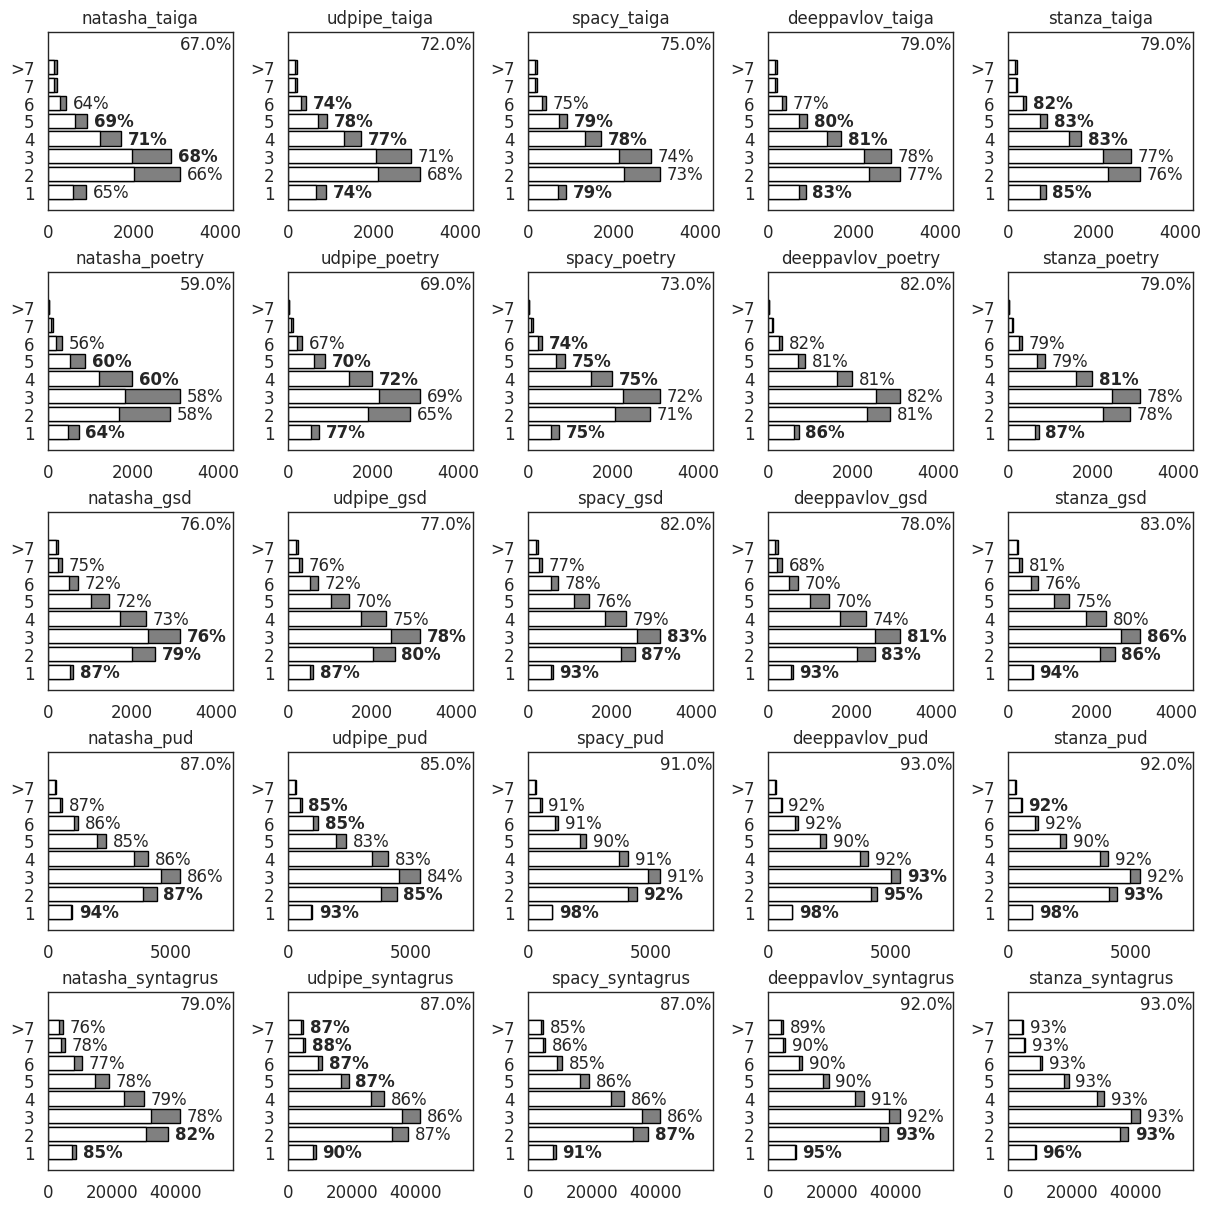

In [104]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), figsize=(12, 12), constrained_layout=True)

for tr_i, tr in enumerate(treebank_names):
  for p_i, p in enumerate(parser_names):
    max_y = min(len(gold_depth_stat[p][tr]), 9)
    positions = np.array(range(max_y))
    d = gold_depth_stat[p][tr]["all"].to_dict()
    bar_all = axs[tr_i][p_i].barh(positions, width=list(d.values())[:max_y], height=0.8, color='grey', edgecolor='black')
    d = gold_depth_stat[p][tr]["right"].to_dict()
    bar_right = axs[tr_i][p_i].barh(positions, width=list(d.values())[:max_y], height=0.8, color='white', edgecolor='black')
    max_x = max(bar_all.datavalues)
    for b_i in range(max_y):
      font = 'normal'
      if bar_right.datavalues[b_i] / bar_all.datavalues[b_i] > gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum():
          font = 'bold'
      axs[tr_i][p_i].text(bar_all.datavalues[b_i] + 0.05 * max_x, b_i - 0.3,
                          f"{ bar_right.datavalues[b_i] / bar_all.datavalues[b_i] * 100:.0f}%" if bar_all.datavalues[b_i] > 0.1 * max_x else "",
                          fontweight=font)
    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    axs[tr_i][p_i].text(max_x, 8, f"{(gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum() * 100).round(0)}%")
    axs[tr_i][p_i].set_ylim(-1, 9)
    axs[tr_i][p_i].set_xlim(0, 1.4 * max_x)
    ylabels = list(map(str, (gold_depth_stat[p][tr].index))) + ["!"] * (max_y - 1 - len(gold_depth_stat[p][tr]))
    axs[tr_i][p_i].set_yticks(positions, labels=ylabels)

plt.savefig("/content/pics/depth_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')
#plt.legend()

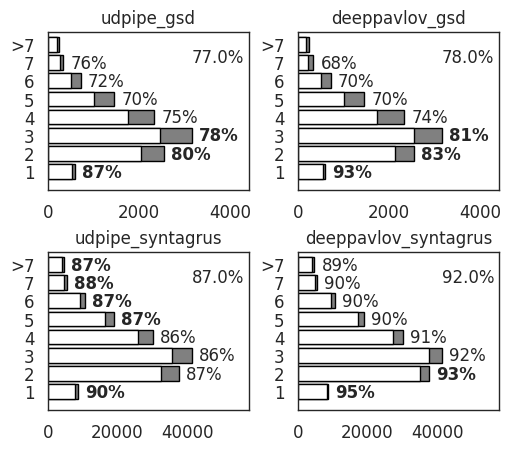

In [105]:
f, axs = plt.subplots(2, 2, figsize=(5, 4.4), constrained_layout=True)

for tr_i, tr in enumerate(['gsd', 'syntagrus']):
  for p_i, p in enumerate(['udpipe', 'deeppavlov']):
    max_y = min(len(gold_depth_stat[p][tr]), 9)
    positions = np.array(range(max_y))
    d = gold_depth_stat[p][tr]["all"].to_dict()
    bar_all = axs[tr_i][p_i].barh(positions, width=list(d.values())[:max_y], height=0.8, color='grey', edgecolor='black')
    d = gold_depth_stat[p][tr]["right"].to_dict()
    bar_right = axs[tr_i][p_i].barh(positions, width=list(d.values())[:max_y], height=0.8, color='white', edgecolor='black')
    max_x = max(bar_all.datavalues)
    for b_i in range(max_y):
      font = 'normal'
      if bar_right.datavalues[b_i] / bar_all.datavalues[b_i] > gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum():
          font = 'bold'
      axs[tr_i][p_i].text(bar_all.datavalues[b_i] + 0.05 * max_x, b_i - 0.3,
                          f"{ bar_right.datavalues[b_i] / bar_all.datavalues[b_i] * 100:.0f}%" if bar_all.datavalues[b_i] > 0.1 * max_x else "",
                          fontweight=font)
    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    axs[tr_i][p_i].text(max_x, 6, f"{(gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum() * 100).round(0)}%")
    axs[tr_i][p_i].set_ylim(-1, 7.7)
    axs[tr_i][p_i].set_xlim(0, 1.4 * max_x)
    ylabels = list(map(str, (gold_depth_stat[p][tr].index))) + ["!"] * (max_y - 1 - len(gold_depth_stat[p][tr]))
    axs[tr_i][p_i].set_yticks(positions, labels=ylabels)

plt.savefig("/content/pics/depth_diagram_prez.eps", format='eps', dpi=300, bbox_inches='tight')
#plt.legend()

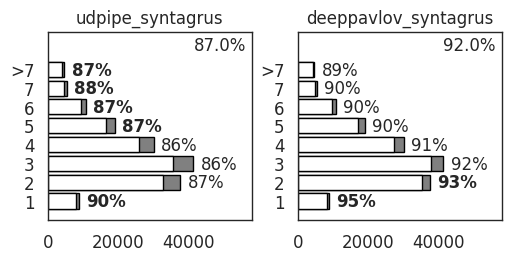

In [106]:
f, axs = plt.subplots(1, 2, figsize=(5, 2.5), constrained_layout=True)

tr = 'syntagrus'
for p_i, p in enumerate(['udpipe', 'deeppavlov']):
  max_y = min(len(gold_depth_stat[p][tr]), 9)
  positions = np.array(range(max_y))
  d = gold_depth_stat[p][tr]["all"].to_dict()
  bar_all = axs[p_i].barh(positions, width=list(d.values())[:max_y], height=0.8, color='grey', edgecolor='black')
  d = gold_depth_stat[p][tr]["right"].to_dict()
  bar_right = axs[p_i].barh(positions, width=list(d.values())[:max_y], height=0.8, color='white', edgecolor='black')
  max_x = max(bar_all.datavalues)
  for b_i in range(max_y):
    font = 'normal'
    if bar_right.datavalues[b_i] / bar_all.datavalues[b_i] > gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum():
      font = 'bold'
    axs[p_i].text(bar_all.datavalues[b_i] + 0.05 * max_x, b_i - 0.3,
                        f"{ bar_right.datavalues[b_i] / bar_all.datavalues[b_i] * 100:.0f}%" if bar_all.datavalues[b_i] > 0.1 * max_x else "",
                  fontweight=font)
  axs[p_i].set_title(f"{p}_{tr}")
  axs[p_i].text(max_x, 8, f"{(gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum() * 100).round(0)}%")
  axs[p_i].set_ylim(-1, 9)
  axs[p_i].set_xlim(0, 1.4 * max_x)
  ylabels = list(map(str, (gold_depth_stat[p][tr].index))) + ["!"] * (max_y - 1 - len(gold_depth_stat[p][tr]))
  axs[p_i].set_yticks(positions, labels=ylabels)

plt.savefig("/content/pics/depth_diagram_prez.eps", format='eps', dpi=300, bbox_inches='tight')
#plt.legend()

### Эталонная длина зависимости

In [107]:
gold_dep_len_stat = {tr: {} for tr in treebank_names}

for tr_i, tr in enumerate(treebank_names):
  for p_i, p in enumerate(parser_names):
    df = create_property_stat(result_df[tr], p, 'gold_dep_len')

    border1 = 3
    right_more, all_more = df[df.index > border1][['right', 'all']].sum().values
    df.drop([ind for ind in df.index if ind > border1], inplace=True)
    border2 = -3
    right_less, all_less = df[df.index < border2][['right', 'all']].sum().values
    df.drop([ind for ind in df.index if ind < border2], inplace=True)
    df.index = list(map(lambda x: str(int(x)), df.index))

    df.loc[f'>{border1}'] = (right_more, right_more / all_more, all_more)
    df.loc[f'<{border2}'] = (right_less, right_less / all_less, all_less)
    gold_dep_len_stat[tr][p] = df

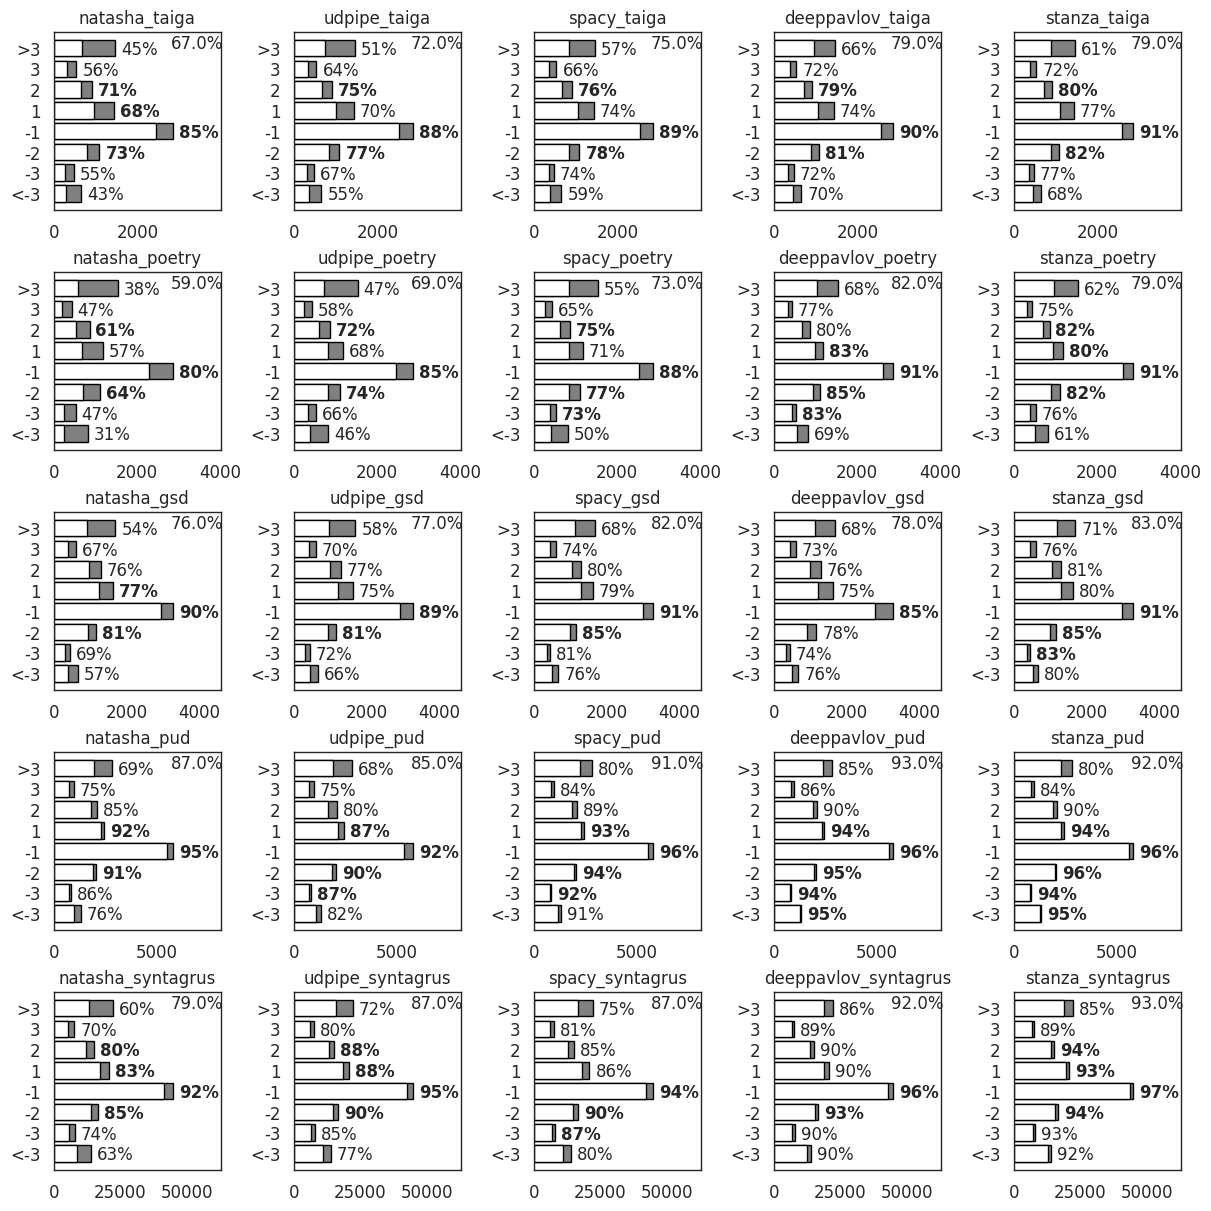

In [122]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), figsize=(12, 12), constrained_layout=True)
labels = ["<-3", "-3", "-2", "-1", "1", "2", "3", ">3"]
max_y = 8
for tr_i, tr in enumerate(treebank_names):
  for p_i, p in enumerate(parser_names):
    bar_all = axs[tr_i][p_i].barh(labels, [gold_dep_len_stat[tr][p].loc[lab]["all"] for lab in labels], height=0.8, color='grey', edgecolor='black')
    bar_right = axs[tr_i][p_i].barh(labels, [gold_dep_len_stat[tr][p].loc[lab]["right"] for lab in labels], height=0.8, color='white', edgecolor='black')
    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    max_x = max(bar_all.datavalues)
    axs[tr_i][p_i].set_xlim(0, 1.4 * max_x)
    axs[tr_i][p_i].text(max_x * 0.98, 7, f"{(gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum() * 100).round(0)}%")
    for b_i in range(max_y):
      font = 'normal'
      if bar_right.datavalues[b_i] / bar_all.datavalues[b_i] > gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum():
          font = 'bold'
      axs[tr_i][p_i].text(bar_all.datavalues[b_i] + 0.05 * max_x, b_i - 0.3,
                          f"{ bar_right.datavalues[b_i] / bar_all.datavalues[b_i] * 100:.0f}%" if bar_all.datavalues[b_i] > 0.1 * max_x else "",
                          fontweight=font)

plt.savefig("/content/pics/dep_len_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/dep_len_diagram.eps", format='eps', dpi=300, bbox_inches='tight')
#plt.legend()

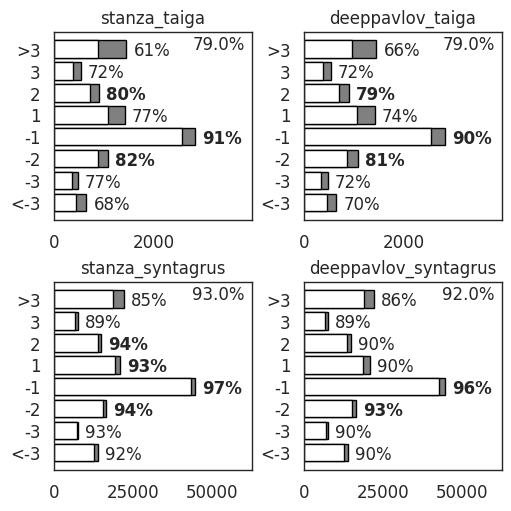

In [109]:
f, axs = plt.subplots(2, 2, figsize=(5, 5), constrained_layout=True)
labels = ["<-3", "-3", "-2", "-1", "1", "2", "3", ">3"]
max_y = 8
for tr_i, tr in enumerate(['taiga', 'syntagrus']):
  for p_i, p in enumerate(['stanza', 'deeppavlov']):
    bar_all = axs[tr_i][p_i].barh(labels, [gold_dep_len_stat[tr][p].loc[lab]["all"] for lab in labels], height=0.8, color='grey', edgecolor='black')
    bar_right = axs[tr_i][p_i].barh(labels, [gold_dep_len_stat[tr][p].loc[lab]["right"] for lab in labels], height=0.8, color='white', edgecolor='black')
    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    max_x = max(bar_all.datavalues)
    axs[tr_i][p_i].set_xlim(0, 1.4 * max_x)
    axs[tr_i][p_i].text(max_x * 0.98, 7, f"{(gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum() * 100).round(0)}%")
    for b_i in range(max_y):
      font = 'normal'
      if bar_right.datavalues[b_i] / bar_all.datavalues[b_i] > gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum():
          font = 'bold'
      axs[tr_i][p_i].text(bar_all.datavalues[b_i] + 0.05 * max_x, b_i - 0.3,
                          f"{ bar_right.datavalues[b_i] / bar_all.datavalues[b_i] * 100:.0f}%" if bar_all.datavalues[b_i] > 0.1 * max_x else "",
                          fontweight=font)

plt.savefig("/content/pics/dep_len_diagram_prez.eps", format='eps', dpi=300, bbox_inches='tight')
#plt.legend()

# Сохранение результата

In [110]:
import shutil
shutil.make_archive('pics', 'tar', '/content/pics/')

'/content/pics.tar'

In [111]:
from google.colab import files
files.download('pics.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Time results

In [112]:
# all parsing, in seconds (from parser running notebook)
all_time_dict = {}
all_time_dict['gsd'] = {'udpipe': 10.036, 'stanza': 481.504, 'natasha': 3.267, 'deeppavlov': 131.280,'spacy': 12.119}
all_time_dict['pud'] = {'udpipe': 18.135, 'stanza': 830.284, 'natasha': 4.613, 'deeppavlov': 193.175,'spacy': 21.383}
all_time_dict['syntagrus'] = {'udpipe': 137.007, 'stanza': 7495.900, 'natasha': 49.834, 'deeppavlov': 1613.516,'spacy': 172.897}
all_time_dict['poetry'] = {'udpipe': 8.961, 'stanza': 469.055, 'natasha': 2.908, 'deeppavlov': 118.674,'spacy': 12.741}
all_time_dict['taiga'] = {'udpipe': 8.741, 'stanza': 532.078, 'natasha': 3.381, 'deeppavlov': 130.404,'spacy': 13.954}

In [113]:
avg_time_dict = {t: {} for t in treebank_names}
for t in treebank_names:
  for p in parser_names:
    avg_time_dict[t][p] = all_time_dict[t][p] / len(treebanks[t])

In [114]:
avg_time_dict

{'taiga': {'natasha': 0.0038376844494892167,
  'udpipe': 0.009921679909194098,
  'spacy': 0.015838819523269012,
  'deeppavlov': 0.14801816118047673,
  'stanza': 0.6039477866061294},
 'poetry': {'natasha': 0.0039945054945054945,
  'udpipe': 0.012309065934065935,
  'spacy': 0.017501373626373627,
  'deeppavlov': 0.16301373626373628,
  'stanza': 0.6443063186813187},
 'gsd': {'natasha': 0.00543594009983361,
  'udpipe': 0.01669883527454243,
  'spacy': 0.020164725457570715,
  'deeppavlov': 0.2184359400998336,
  'stanza': 0.801171381031614},
 'pud': {'natasha': 0.004613000000000001,
  'udpipe': 0.018135000000000002,
  'spacy': 0.021383,
  'deeppavlov': 0.193175,
  'stanza': 0.830284},
 'syntagrus': {'natasha': 0.005662954545454546,
  'udpipe': 0.015568977272727273,
  'spacy': 0.019647386363636363,
  'deeppavlov': 0.1833540909090909,
  'stanza': 0.8518068181818181}}

In [115]:
parser_names

['natasha', 'udpipe', 'spacy', 'deeppavlov', 'stanza']

In [116]:
parser_titles

['Natasha', 'UDPipe', 'spacy', 'DeepPavlov', 'Stanza']

In [117]:
avg_time_df = pd.DataFrame([[avg_time_dict[treebank][p]
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [118]:
{p: [avg_time_dict[t][p] for t in treebank_names] for p in parser_names}

{'natasha': [0.0038376844494892167,
  0.0039945054945054945,
  0.00543594009983361,
  0.004613000000000001,
  0.005662954545454546],
 'udpipe': [0.009921679909194098,
  0.012309065934065935,
  0.01669883527454243,
  0.018135000000000002,
  0.015568977272727273],
 'spacy': [0.015838819523269012,
  0.017501373626373627,
  0.020164725457570715,
  0.021383,
  0.019647386363636363],
 'deeppavlov': [0.14801816118047673,
  0.16301373626373628,
  0.2184359400998336,
  0.193175,
  0.1833540909090909],
 'stanza': [0.6039477866061294,
  0.6443063186813187,
  0.801171381031614,
  0.830284,
  0.8518068181818181]}

In [119]:
#avg_time_df.iloc['treebank average'] = {p: [avg_time_dict[t][p] for t in treebank_names] for p in parser_names}

In [120]:
avg_time_df.round(3)

,Taiga,Poetry,GSD,PUD,SynTagRus
Natasha,0.004,0.004,0.005,0.005,0.006
UDPipe,0.010,0.012,0.017,0.018,0.016
spacy,0.016,0.018,0.020,0.021,0.020
DeepPavlov,0.148,0.163,0.218,0.193,0.183
Stanza,0.604,0.644,0.801,0.830,0.852


In [121]:
for p in parser_names:
  p_times = [avg_time_dict[t][p] for t in treebank_names]
  print(p, f"{sum(p_times) / len(p_times):.3f} s")

natasha 0.005 s
udpipe 0.015 s
spacy 0.019 s
deeppavlov 0.181 s
stanza 0.746 s
